# Classification -   Evaluation

This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status
* education     --> highest education finished  
* default       --> already has credit in default?
* balance       --> account balance
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact
* duration      --> duration of last contact
* campaign      --> number of contacts made to the client during the campaign
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted)
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use colab

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib,.. and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

### Hints -

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them.

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [3 points]

* Pre-process the dataset and provide a detailed explanation.  [10 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [10 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [5 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [4points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [10 points]

* Compare the results of the classifier using gini and entropy [6 points]

* Print the decision tree visualization with depth of 5 [6points]
* Perform the Random Forest Classifier(RFC) with the same dataset [6]
* Evaluate the decision tree model and Random Forest Classifier[6]
* Perform and plot the ROC curves for the two classifiers on the same graph[6]
* interpret the ROC graph[6]`
* Demo[18]



# CODE

# Task 1

Import the important libraries and load the dataset

In [2]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

In [3]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith mounted the Drive using drive.mount()
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith read the dataset_DT.csv file to vars_data using Pandas
x = "/content/dataset_DT.csv"
vars_data = pd.read_csv(x)

In [5]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith displayed the head of the vars_data dataframe using head()
vars_data.head()

age          job   marital  education default  balance housing loan  \
0  34.0  blue-collar    single  secondary      no  13408.0      no   no   
1  49.0   management  divorced   tertiary      no  20727.0      no   no   
2  32.0     services    single   tertiary      no   1743.0     yes   no   
3  46.0   management  divorced   tertiary      no  10469.0     yes   no   
4  26.0   management    single   tertiary      no   7628.0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr     647.0       2.0   -1.0       0.0  unknown  no  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
3  cellular  1.0   apr     202.0       2.0   -1.0       0.0  unknown  no  
4  cellular  1.0   apr     263.0       1.0   -1.0       0.0  unknown  no

# Task 2
Pre-Process the dataset

I combined both day and month columns to date_of_contact column, in this way we can reduce the features(reduces dimentinality)

In [6]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith created new column called 'Date_of_Contact' which is combination of 'day' and 'month' column
vars_data['Date_of_Contact'] = vars_data['month']+'/' + vars_data['day'].astype(str)


I Handeled 'unknown' records by converting them into 'NAN'

In [7]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith replaced data record "unknown" with nan using np.nan
vars_nan_data=vars_data.replace("unknown", np.nan)

# Varshith displayed the dataframe
display(vars_nan_data)

age           job   marital  education default  balance housing loan  \
0      34.0   blue-collar    single  secondary      no  13408.0      no   no   
1      49.0    management  divorced   tertiary      no  20727.0      no   no   
2      32.0      services    single   tertiary      no   1743.0     yes   no   
3      46.0    management  divorced   tertiary      no  10469.0     yes   no   
4      26.0    management    single   tertiary      no   7628.0      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
18418  41.0    technician   married  secondary      no   2152.0      no   no   
18419  57.0    management   married        NaN      no      0.0      no   no   
18420  40.0   blue-collar   married  secondary      no   1451.0      no   no   
18421  38.0    technician    single  secondary      no   1711.0      no   no   
18422  84.0  entrepreneur   married  secondary      no      0.0      no   no   

         contact   day month  duration  campaign  pdays  previous poutcome  \
0       cellular   1.0   apr     647.0       2.0   -1.0       0.0      NaN   
1       cellular   1.0   apr     285.0       3.0  132.0       2.0  failure   
2       cellular   1.0   apr    1156.0       1.0  261.0       3.0    other   
3       cellular   1.0   apr     202.0       2.0   -1.0       0.0      NaN   
4       cellular   1.0   apr     263.0       1.0   -1.0       0.0      NaN   
...          ...   ...   ...       ...       ...    ...       ...      ...   
18418   cellular  30.0   sep     134.0       1.0  121.0       1.0    other   
18419   cellular  30.0   sep     585.0       1.0   -1.0       0.0      NaN   
18420   cellular  30.0   sep     117.0       1.0  121.0       1.0  success   
18421  telephone  30.0   sep     234.0       1.0   -1.0       0.0      NaN   
18422  telephone  30.0   sep     992.0       2.0   -1.0       0.0      NaN   

         y Date_of_Contact  
0       no         apr/1.0  
1       no         apr/1.0  
2       no         apr/1.0  
3       no         apr/1.0  
4       no         apr/1.0  
...    ...             ...  
18418   no        sep/30.0  
18419   no        sep/30.0  
18420  yes        sep/30.0  
18421  yes        sep/30.0  
18422  yes        sep/30.0  

[18423 rows x 18 columns]

In [8]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith counted number of nan values of each column
vars_nan_count = vars_nan_data.isna().sum()

# Varshith displayed number of nan values in each column
for vars_col, vars_count in vars_nan_count.items():
    print(f"{vars_col} has {vars_count}  nan values")

age has 0  nan values
job has 112  nan values
marital has 0  nan values
education has 1073  nan values
default has 0  nan values
balance has 0  nan values
housing has 0  nan values
loan has 0  nan values
contact has 4313  nan values
day has 306  nan values
month has 314  nan values
duration has 0  nan values
campaign has 0  nan values
pdays has 0  nan values
previous has 0  nan values
poutcome has 13259  nan values
y has 0  nan values
Date_of_Contact has 314  nan values


# Dropped 'poutcome' Column

I dropped 'poutcome' because it has more than 13259 missing data(more than 60%)

In [9]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith dropped poutcome column
vars_nan_data=vars_nan_data.drop(['poutcome'], axis=1)

# Varshith printed the vars_nan_data
display(vars_nan_data)


age           job   marital  education default  balance housing loan  \
0      34.0   blue-collar    single  secondary      no  13408.0      no   no   
1      49.0    management  divorced   tertiary      no  20727.0      no   no   
2      32.0      services    single   tertiary      no   1743.0     yes   no   
3      46.0    management  divorced   tertiary      no  10469.0     yes   no   
4      26.0    management    single   tertiary      no   7628.0      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
18418  41.0    technician   married  secondary      no   2152.0      no   no   
18419  57.0    management   married        NaN      no      0.0      no   no   
18420  40.0   blue-collar   married  secondary      no   1451.0      no   no   
18421  38.0    technician    single  secondary      no   1711.0      no   no   
18422  84.0  entrepreneur   married  secondary      no      0.0      no   no   

         contact   day month  duration  campaign  pdays  previous    y  \
0       cellular   1.0   apr     647.0       2.0   -1.0       0.0   no   
1       cellular   1.0   apr     285.0       3.0  132.0       2.0   no   
2       cellular   1.0   apr    1156.0       1.0  261.0       3.0   no   
3       cellular   1.0   apr     202.0       2.0   -1.0       0.0   no   
4       cellular   1.0   apr     263.0       1.0   -1.0       0.0   no   
...          ...   ...   ...       ...       ...    ...       ...  ...   
18418   cellular  30.0   sep     134.0       1.0  121.0       1.0   no   
18419   cellular  30.0   sep     585.0       1.0   -1.0       0.0   no   
18420   cellular  30.0   sep     117.0       1.0  121.0       1.0  yes   
18421  telephone  30.0   sep     234.0       1.0   -1.0       0.0  yes   
18422  telephone  30.0   sep     992.0       2.0   -1.0       0.0  yes   

      Date_of_Contact  
0             apr/1.0  
1             apr/1.0  
2             apr/1.0  
3             apr/1.0  
4             apr/1.0  
...               ...  
18418        sep/30.0  
18419        sep/30.0  
18420        sep/30.0  
18421        sep/30.0  
18422        sep/30.0  

[18423 rows x 17 columns]

I found 'mode' of each column and replaced the 'nan' values with the mode value of each column.

In [10]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith replaced 'nan' values with mode value of each column
vars_final_data=vars_nan_data.fillna(vars_nan_data.mode().iloc[0])

# Varshith displayed the dataframe
display(vars_final_data)


age           job   marital  education default  balance housing loan  \
0      34.0   blue-collar    single  secondary      no  13408.0      no   no   
1      49.0    management  divorced   tertiary      no  20727.0      no   no   
2      32.0      services    single   tertiary      no   1743.0     yes   no   
3      46.0    management  divorced   tertiary      no  10469.0     yes   no   
4      26.0    management    single   tertiary      no   7628.0      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
18418  41.0    technician   married  secondary      no   2152.0      no   no   
18419  57.0    management   married  secondary      no      0.0      no   no   
18420  40.0   blue-collar   married  secondary      no   1451.0      no   no   
18421  38.0    technician    single  secondary      no   1711.0      no   no   
18422  84.0  entrepreneur   married  secondary      no      0.0      no   no   

         contact   day month  duration  campaign  pdays  previous    y  \
0       cellular   1.0   apr     647.0       2.0   -1.0       0.0   no   
1       cellular   1.0   apr     285.0       3.0  132.0       2.0   no   
2       cellular   1.0   apr    1156.0       1.0  261.0       3.0   no   
3       cellular   1.0   apr     202.0       2.0   -1.0       0.0   no   
4       cellular   1.0   apr     263.0       1.0   -1.0       0.0   no   
...          ...   ...   ...       ...       ...    ...       ...  ...   
18418   cellular  30.0   sep     134.0       1.0  121.0       1.0   no   
18419   cellular  30.0   sep     585.0       1.0   -1.0       0.0   no   
18420   cellular  30.0   sep     117.0       1.0  121.0       1.0  yes   
18421  telephone  30.0   sep     234.0       1.0   -1.0       0.0  yes   
18422  telephone  30.0   sep     992.0       2.0   -1.0       0.0  yes   

      Date_of_Contact  
0             apr/1.0  
1             apr/1.0  
2             apr/1.0  
3             apr/1.0  
4             apr/1.0  
...               ...  
18418        sep/30.0  
18419        sep/30.0  
18420        sep/30.0  
18421        sep/30.0  
18422        sep/30.0  

[18423 rows x 17 columns]

I categorized the continuous 'Age' cloumn to categorical column using mapping function.(categorized data is prefered)

In [11]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created new column called 'Age_group' with age categories "<19", "19-30", "30-40", "40-60", "60-75", "75+".
vars_final_data['Age_Group'] = pd.cut(vars_final_data['age'], bins=[0, 19, 30, 40, 60, 75, 100], labels=["<19", "19-30", "30-40", "40-60", "60-75", "75+"])


# IF-Else Condition is used to categorized the balance column.

I tried to use bins and pd.cut(used for categorizing Age_Group), but is showing error when I tried to categorize data into negative, zero, positive using bins, so I used if-else condition to categorize the records of balance column and got desired output.

In [12]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith used if-else condition to categorize data into Positive, Negative and Zero
def balance_group(balance):
    if balance > 0:
        return 'Positive balance'
    elif balance < 0 :
        return 'Negative balance'
    else:
        return 'Zero balance'

# Varshith used map function and created new column called account_balance_group and it has categorized values
vars_final_data['account_balance_group'] = vars_final_data['balance'].map(balance_group)

In [13]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created new column called 'previous_contact_group' with previous categories "No Previous Contact", "Low Previous Contact", "Moderate Previous Contact", "High Previous Contact".
vars_final_data['previous_contact_group'] = pd.cut(vars_final_data['previous'], bins=[-1, 0, 10, 30, 100], labels=["No Previous Contact", "Low Previous Contact", "Moderate Previous Contact", "High Previous Contact"])

I categorized the continuous 'previous' cloumn to categorical column using mapping function.(caregorized data is prefered)

In [14]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith displayed the dataframe
display(vars_final_data)

age           job   marital  education default  balance housing loan  \
0      34.0   blue-collar    single  secondary      no  13408.0      no   no   
1      49.0    management  divorced   tertiary      no  20727.0      no   no   
2      32.0      services    single   tertiary      no   1743.0     yes   no   
3      46.0    management  divorced   tertiary      no  10469.0     yes   no   
4      26.0    management    single   tertiary      no   7628.0      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
18418  41.0    technician   married  secondary      no   2152.0      no   no   
18419  57.0    management   married  secondary      no      0.0      no   no   
18420  40.0   blue-collar   married  secondary      no   1451.0      no   no   
18421  38.0    technician    single  secondary      no   1711.0      no   no   
18422  84.0  entrepreneur   married  secondary      no      0.0      no   no   

         contact   day month  duration  campaign  pdays  previous    y  \
0       cellular   1.0   apr     647.0       2.0   -1.0       0.0   no   
1       cellular   1.0   apr     285.0       3.0  132.0       2.0   no   
2       cellular   1.0   apr    1156.0       1.0  261.0       3.0   no   
3       cellular   1.0   apr     202.0       2.0   -1.0       0.0   no   
4       cellular   1.0   apr     263.0       1.0   -1.0       0.0   no   
...          ...   ...   ...       ...       ...    ...       ...  ...   
18418   cellular  30.0   sep     134.0       1.0  121.0       1.0   no   
18419   cellular  30.0   sep     585.0       1.0   -1.0       0.0   no   
18420   cellular  30.0   sep     117.0       1.0  121.0       1.0  yes   
18421  telephone  30.0   sep     234.0       1.0   -1.0       0.0  yes   
18422  telephone  30.0   sep     992.0       2.0   -1.0       0.0  yes   

      Date_of_Contact Age_Group account_balance_group previous_contact_group  
0             apr/1.0     30-40      Positive balance    No Previous Contact  
1             apr/1.0     40-60      Positive balance   Low Previous Contact  
2             apr/1.0     30-40      Positive balance   Low Previous Contact  
3             apr/1.0     40-60      Positive balance    No Previous Contact  
4             apr/1.0     19-30      Positive balance    No Previous Contact  
...               ...       ...                   ...                    ...  
18418        sep/30.0     40-60      Positive balance   Low Previous Contact  
18419        sep/30.0     40-60          Zero balance    No Previous Contact  
18420        sep/30.0     30-40      Positive balance   Low Previous Contact  
18421        sep/30.0     30-40      Positive balance    No Previous Contact  
18422        sep/30.0       75+          Zero balance    No Previous Contact  

[18423 rows x 20 columns]

I dropped the unwanted columns to improve the model accuracy

In [15]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith dropped 'day','Date_of_Contact', 'month', 'age','balance','previous' columns to improve model accuracy
vars_final_data=vars_final_data.drop(['day','Date_of_Contact','month','age','balance','previous'], axis=1)




I mapped the class labels, yes to 1 and no to 0, to effectively analyse the models

In [16]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith mapped target variable 'y', yes as 1 and no as 0.
vars_final_data['y'] = vars_final_data['y'].map({'yes': 1, 'no': 0})


In [17]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith converted Age_Group to object type
vars_final_data['Age_Group'] = vars_final_data['Age_Group'].astype('object')



In [18]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith converted account_balance_group to object type
vars_final_data['account_balance_group'] = vars_final_data['account_balance_group'].astype('object')

In [19]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith converted previous_contact_group to object type
vars_final_data['previous_contact_group'] = vars_final_data['previous_contact_group'].astype('object')



I dropped 'Default' feature because, in finding top-6 feature(next task), we found that default feature has zero correlation with target class, so we dropped 'default'

In [20]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith dropped default feature
vars_final_data=vars_final_data.drop(['default'], axis=1)

In [21]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith displayed the output
display(vars_final_data)


job   marital  education housing loan    contact  duration  \
0       blue-collar    single  secondary      no   no   cellular     647.0   
1        management  divorced   tertiary      no   no   cellular     285.0   
2          services    single   tertiary     yes   no   cellular    1156.0   
3        management  divorced   tertiary     yes   no   cellular     202.0   
4        management    single   tertiary      no   no   cellular     263.0   
...             ...       ...        ...     ...  ...        ...       ...   
18418    technician   married  secondary      no   no   cellular     134.0   
18419    management   married  secondary      no   no   cellular     585.0   
18420   blue-collar   married  secondary      no   no   cellular     117.0   
18421    technician    single  secondary      no   no  telephone     234.0   
18422  entrepreneur   married  secondary      no   no  telephone     992.0   

       campaign  pdays  y Age_Group account_balance_group  \
0           2.0   -1.0  0     30-40      Positive balance   
1           3.0  132.0  0     40-60      Positive balance   
2           1.0  261.0  0     30-40      Positive balance   
3           2.0   -1.0  0     40-60      Positive balance   
4           1.0   -1.0  0     19-30      Positive balance   
...         ...    ... ..       ...                   ...   
18418       1.0  121.0  0     40-60      Positive balance   
18419       1.0   -1.0  0     40-60          Zero balance   
18420       1.0  121.0  1     30-40      Positive balance   
18421       1.0   -1.0  1     30-40      Positive balance   
18422       2.0   -1.0  1       75+          Zero balance   

      previous_contact_group  
0        No Previous Contact  
1       Low Previous Contact  
2       Low Previous Contact  
3        No Previous Contact  
4        No Previous Contact  
...                      ...  
18418   Low Previous Contact  
18419    No Previous Contact  
18420   Low Previous Contact  
18421    No Previous Contact  
18422    No Previous Contact  

[18423 rows x 13 columns]

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith showed the information about the each column
vars_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job                     18423 non-null  object 
 1   marital                 18423 non-null  object 
 2   education               18423 non-null  object 
 3   housing                 18423 non-null  object 
 4   loan                    18423 non-null  object 
 5   contact                 18423 non-null  object 
 6   duration                18423 non-null  float64
 7   campaign                18423 non-null  float64
 8   pdays                   18423 non-null  float64
 9   y                       18423 non-null  int64  
 10  Age_Group               18423 non-null  object 
 11  account_balance_group   18423 non-null  object 
 12  previous_contact_group  18423 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.8+ MB


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith showed the description about the each column
vars_final_data.describe(include='all')

job  marital  education housing   loan   contact      duration  \
count        18423    18423      18423   18423  18423     18423  18423.000000   
unique          11        3          3       2      2         2           NaN   
top     management  married  secondary     yes     no  cellular           NaN   
freq          4194    10693      10078    9645  15924     17308           NaN   
mean           NaN      NaN        NaN     NaN    NaN       NaN    411.779569   
std            NaN      NaN        NaN     NaN    NaN       NaN    323.241660   
min            NaN      NaN        NaN     NaN    NaN       NaN      5.000000   
25%            NaN      NaN        NaN     NaN    NaN       NaN    192.000000   
50%            NaN      NaN        NaN     NaN    NaN       NaN    316.000000   
75%            NaN      NaN        NaN     NaN    NaN       NaN    533.000000   
max            NaN      NaN        NaN     NaN    NaN       NaN   3881.000000   

            campaign         pdays             y Age_Group  \
count   18423.000000  18423.000000  18423.000000     18423   
unique           NaN           NaN           NaN         6   
top              NaN           NaN           NaN     30-40   
freq             NaN           NaN           NaN      7312   
mean        2.279433     57.421213      0.287087       NaN   
std         1.981642    112.455326      0.452415       NaN   
min         1.000000     -1.000000      0.000000       NaN   
25%         1.000000     -1.000000      0.000000       NaN   
50%         2.000000     -1.000000      0.000000       NaN   
75%         3.000000     91.000000      1.000000       NaN   
max        55.000000    871.000000      1.000000       NaN   

       account_balance_group previous_contact_group  
count                  18423                  18423  
unique                     3                      4  
top         Positive balance    No Previous Contact  
freq                   16652                  13254  
mean                     NaN                    NaN  
std                      NaN                    NaN  
min                      NaN                    NaN  
25%                      NaN                    NaN  
50%                      NaN                    NaN  
75%                      NaN                    NaN  
max                      NaN                    NaN

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith showed the vars_final_data top 5 objects
vars_final_data.head()

job   marital  education housing loan   contact  duration  \
0  blue-collar    single  secondary      no   no  cellular     647.0   
1   management  divorced   tertiary      no   no  cellular     285.0   
2     services    single   tertiary     yes   no  cellular    1156.0   
3   management  divorced   tertiary     yes   no  cellular     202.0   
4   management    single   tertiary      no   no  cellular     263.0   

   campaign  pdays  y Age_Group account_balance_group previous_contact_group  
0       2.0   -1.0  0     30-40      Positive balance    No Previous Contact  
1       3.0  132.0  0     40-60      Positive balance   Low Previous Contact  
2       1.0  261.0  0     30-40      Positive balance   Low Previous Contact  
3       2.0   -1.0  0     40-60      Positive balance    No Previous Contact  
4       1.0   -1.0  0     19-30      Positive balance    No Previous Contact

# Task
Top 6 most influential features

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned the all continuous features to vars_cont_features
vars_cont_features = ['duration',	'campaign',	'pdays']

# Varshith assigned the all categorical features to vars_cat_features
vars_cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group','previous_contact_group']

# Varshith assigned target variable 'y' to vars_target
vars_target = 'y'

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created empty vars_cont_corr list
vars_cont_corr = {}

# Varshith using pointbiserialr library found correlation between continuous features and target variable
for vars_cont in vars_cont_features:
    vars_corr, _ = pointbiserialr(vars_final_data[vars_cont], vars_final_data['y'])
    vars_cont_corr[vars_cont] = vars_corr

# Varshith sorted the vars_cont_corr in descending order
cont_corr_sort= dict(sorted(vars_cont_corr.items(), reverse=True,  key=lambda item: item[1]))

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith using lambda function and chi2_contingency calculated vars_cate_func, which is used to calculate correlation of categorical values and target variable
vars_cate_func = lambda kkr, mi: np.sqrt(
    max(0,(chi2_contingency(pd.crosstab(kkr, mi))[0] / kkr.shape[0])- ((mi.nunique() - 1) * (kkr.nunique() - 1)) / (kkr.shape[0] - 1)
    )/ min((mi.nunique() - 1), (kkr.nunique() - 1))
)



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created empty vars_cat_corr list
vars_cat_corr = {}

# Varshith using chi2_contingency library and vars_cat_func found correlation between categorical features and target variable
for vars_cat in vars_cat_features:
    vars = vars_cate_func(vars_final_data[vars_cat], vars_final_data['y'])
    vars_cat_corr[vars_cat] = vars

# Varshith sorted the vars_cat_corr in descending order
cat_corr_sort = dict(sorted( vars_cat_corr.items(), reverse=True, key=lambda item: item[1]))

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed the Correlation of categorical attribute with target variable
print("Correlation of categorical attribute with target variable:")
for vars_cat, data in cat_corr_sort.items():
    print(f"{vars_cat}: {data}")

# Varshith printed the Correlation of continuous attribute with target variable
print("Correlation of continuous attribute with target variable:")
for vars_cont, data in cont_corr_sort.items():
    print(f"{vars_cont}: {data}")


Correlation of categorical attribute with target variable:
housing: 0.20008410044016212
Age_Group: 0.18134964499340342
job: 0.16922769393361065
previous_contact_group: 0.11205618198421233
education: 0.08321586647968665
loan: 0.08128574656546601
marital: 0.0791622964236699
contact: 0.034132943808279755
account_balance_group: 0.015321862434768633
Correlation of continuous attribute with target variable:
duration: 0.2464157043132649
pdays: 0.06366441172889604
campaign: -0.04431660515865931


# Conclusion on Top 6 most influential columns:
So, after preprocessing the dataset, I calculated correlation between each feature and target variable, and my analysis showed duration, housing, age_group, job, previous and education features have highest correlation with target attribute, so these features have most influence on target attribute.


# Perform 2 visualizations of the features with respect to target variable

# 1. Violin plot

I plotted violin plot to show the visualization between each features with respect to target variables. Violin plot can be used to show plot of categorical and continuous features respect to target feature. In categorical features w.r.t target feature, violin becomes horizontal and the corners(ends) of violin becomes bulk depending on class labels 0 and 1. In continuous features w.r.t target features, violin becomes vertical, ends of violin becomes bulk depends on values of continous attributes. Violin plot can be used to plot categorical and continuous attributes w.r.t target variables and show their relationship. For instance, for the graph education feature and y, we can observe that if education is secondary then the there is high chance that customer subscription is no. If education=tertiary there is high chance that subscription is yes as compared to others. And we observe that, if housing is yes then high chances that subscription is no and if housing os no the subscription is yes comapred to others. For age grout above 60+ subscription is yes mostly. And we can observe that retired people has more chance to take subscription as compared to other professionals. And if duration>1000 there is high chance that subscription is yes. If previou_contact_group=low then there is high probability that subscription is yes as compared to others.
And If previou_contact_group=no contact then there is high probability that subscription is no.

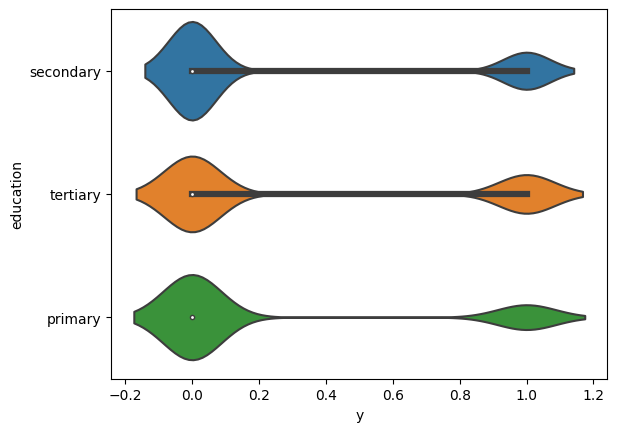

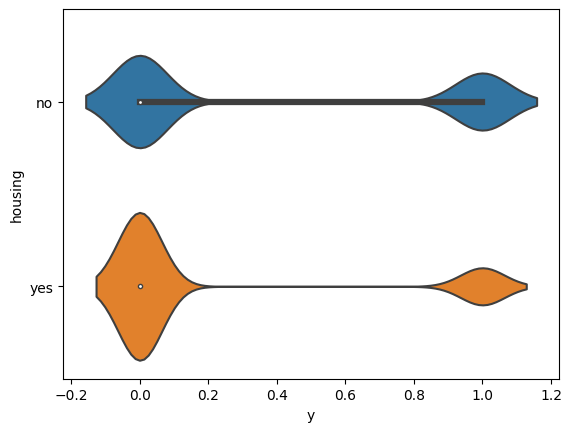

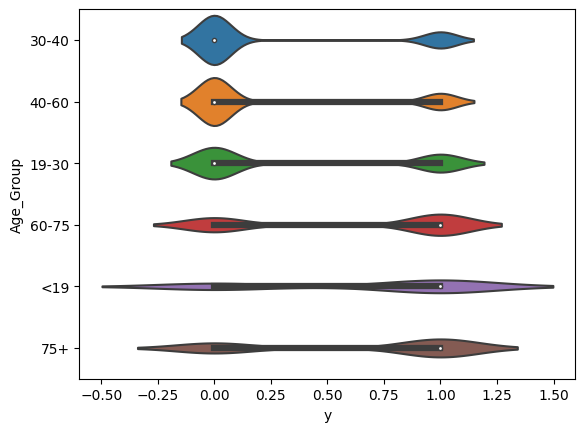

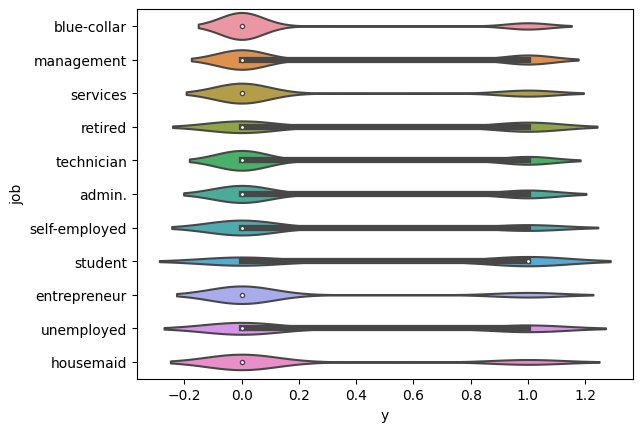

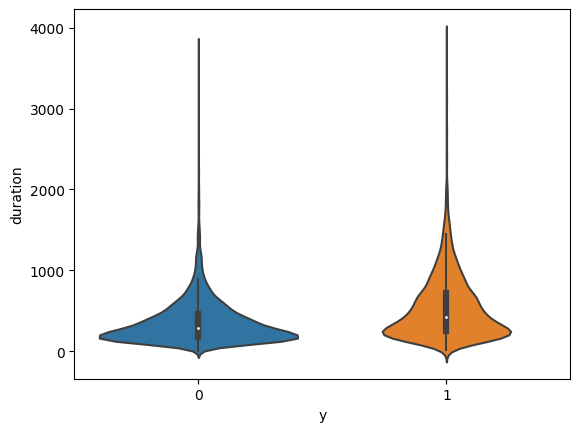

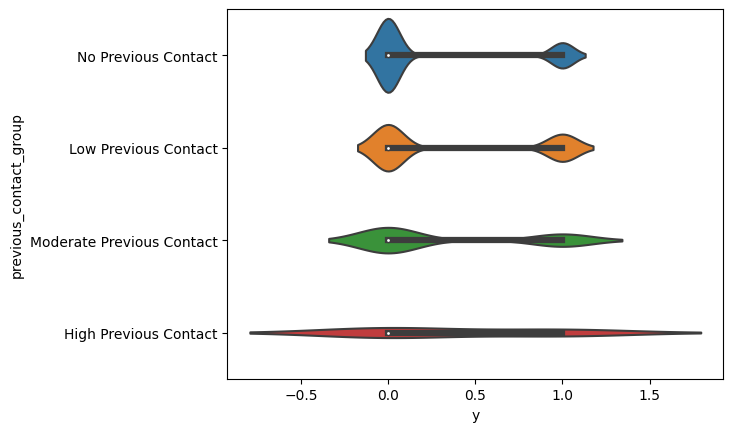

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned poutcome, housing, age_group, job, duration, previous_contact_group, education features to vars_plot_cols list
vars_plot_cols = ['education', 'housing', 'Age_Group', 'job', 'duration', 'previous_contact_group']

# Varshith plotted the violin plot
for vars_cols in vars_plot_cols:
    sns.violinplot(x='y', y=vars_cols, data=vars_final_data)
    plt.show()

# 2 Count chart(kind=bar)
I plotted count plot with kind=bar to show the visualization between each categorical features with respect to target variables. The plot can be used to show plot of categorical features respect to target feature. In categorical features w.r.t target features, we plotted the graph for categorical attribute and showed for each feature how it has relationship with target variable. For instance, for the graph education feature and y, we can observe that if education is secondary then the there is high chance that customer subscription is no. If education=tertiary there is high chance that subscription is yes as compared to others. And we observe that, if housing is yes then high chances that subscription is no and if housing os no the subscription is yes comapred to others. For age grout above 60+ subscription is yes mostly. And we can observe that retired people has more chance to take subscription as compared to other professionals. If previou_contact_group=low then there is high probability that subscription is yes as compared to others. And If previou_contact_group=no contact then there is high probability that subscription is no.

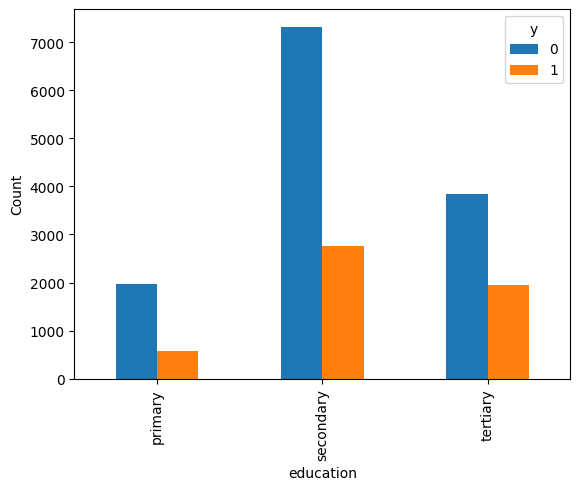

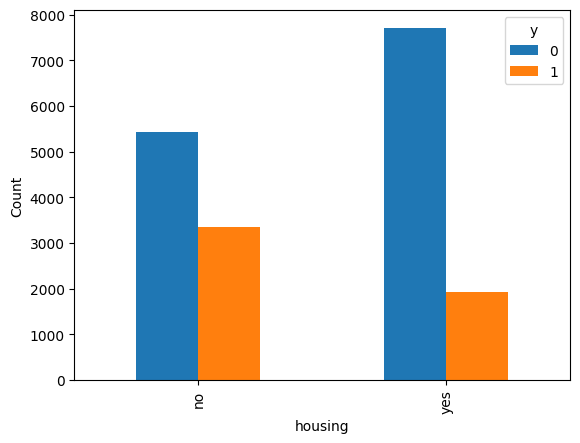

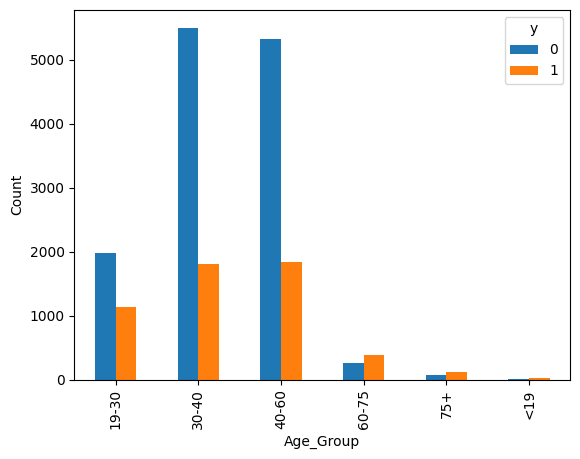

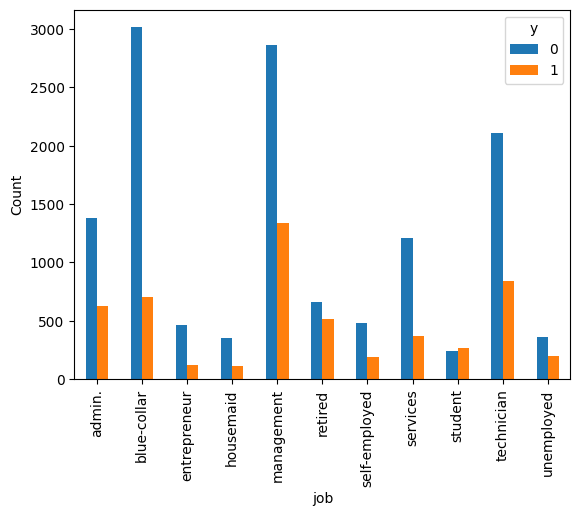

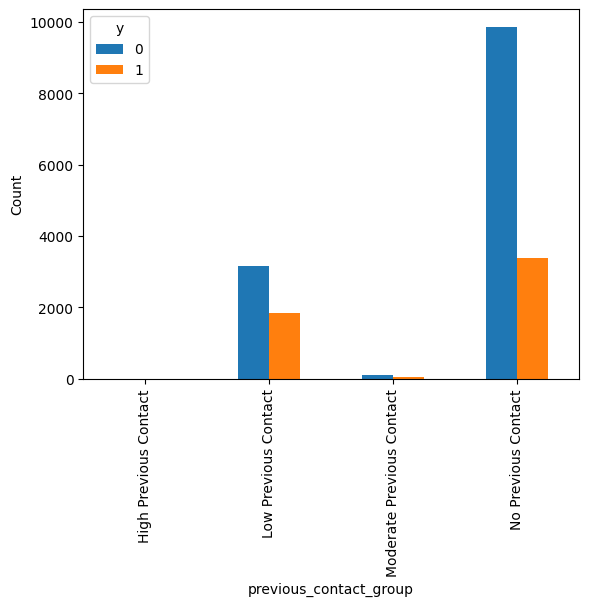

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned 'education','housing', 'Age_Group', 'job','previous_contact_group'(top influential categorical features) to vars_bar_cols list
vars_bar_cols = ['education','housing', 'Age_Group', 'job','previous_contact_group']

# Varshith assigned 'y' to vars_target
vars_target = 'y'

# Varshith ploted the count chart(kind=bar)
for vars_bar in vars_bar_cols:
    vars_plot = vars_final_data.groupby([vars_bar, vars_target]).size().unstack(fill_value=0)
    vars_plot.plot(kind='bar')
    plt.xlabel(vars_bar)
    plt.ylabel('Count')
    plt.show()

# Task Split your dataset 75% for training, and 25% for testing the classifier.

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith dropped target variable and stored in 'boy'
boy = vars_final_data.drop('y', axis = 1)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned target variable y to 'captain_america'
captain_america = vars_final_data['y']


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith split the dataset with 75% train datset and 25% test dataset and randomstate=44
kkr_train, kkr_test, mi_train, mi_test = train_test_split(boy, captain_america, test_size=0.25, random_state=44)

# Task - Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned the all continuous features to vars_cont_features
vars_cont_features = ['duration',	'campaign',	'pdays']

# Varshith assigned the all categorical features to vars_cat_features
vars_cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group','previous_contact_group']



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_preprocess_feature that add standardscaler() to continuous features and onehotencoder() to categorical features.
vars_preprocess_feature = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), vars_cont_features),
        ('categorical', OneHotEncoder(), vars_cat_features)
    ])



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith added preprocessor to decisiontreeclassifier(gini) model using pipeline
vars_pipeline = Pipeline(steps=[('preprocessor', vars_preprocess_feature),
                           ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, random_state=44))])



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith fitted vars_pipeline to training data
vars_pipeline.fit(kkr_train, mi_train)

# Varshith predicted the test dataset and stored in vars_gini_predict
vars_gini_predict = vars_pipeline.predict(kkr_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated the test and train dataset accuracy
vars_train_acc = vars_pipeline.score(kkr_train, mi_train)
vars_test_acc = vars_pipeline.score(kkr_test, mi_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed the test and train dataset accuracy
print(f"Accuracy of train: {vars_train_acc}")
print(f"Accuracy of test: {vars_test_acc}")

Accuracy of train: 0.7520445827603677
Accuracy of test: 0.7453321754233608


# Task - Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria.

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated the confusion matrix of gini criterion using mi_test, vars_gini_predict
vars_gini_confusion_matrix = confusion_matrix(mi_test, vars_gini_predict)

# Varshith printed the Confusion matrix of gini criterion
print(vars_gini_confusion_matrix)




[[2889  410]
 [ 763  544]]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated the classification report of gini criterion using mi_test, vars_gini_predict
vars_gini_classification_report= classification_report(mi_test, vars_gini_predict, target_names=['No', 'Yes'])

# Varshith printed the classification report of gini criterion
print(vars_gini_classification_report)


              precision    recall  f1-score   support

          No       0.79      0.88      0.83      3299
         Yes       0.57      0.42      0.48      1307

    accuracy                           0.75      4606
   macro avg       0.68      0.65      0.66      4606
weighted avg       0.73      0.75      0.73      4606



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported accuracy_score library from sklearn.metrics
from sklearn.metrics import accuracy_score

# Varshith calculated Random Forrest Classiffier accuracy
vars_gini_accuracy = accuracy_score(mi_test, vars_gini_predict)

print(vars_gini_accuracy)


0.7453321754233608


True Positives: 544
False Negatives: 763
False Positives: 410
True Negatives: 2889


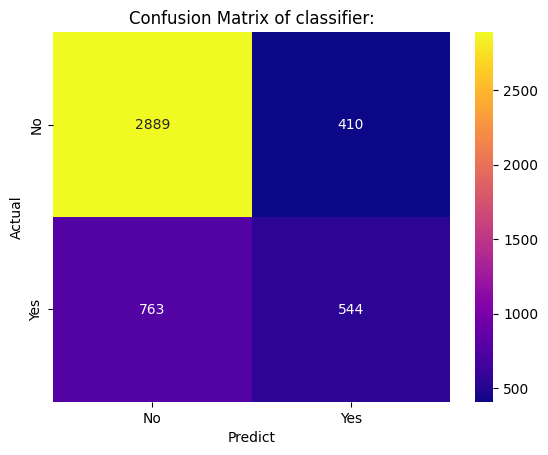

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith showed confusion matrix of gini using heatmap
sns.heatmap(vars_gini_confusion_matrix, cmap='plasma', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], annot=True, fmt='d')
plt.title("Confusion Matrix of classifier:")
plt.xlabel("Predict")
plt.ylabel("Actual")

# Varshith found True Positive, False Positive, False Negative, True Negative
Tru_Pos = vars_gini_confusion_matrix[1, 1]
Fal_Neg= vars_gini_confusion_matrix[1, 0]
Fal_Pos = vars_gini_confusion_matrix[0, 1]
Tru_Neg = vars_gini_confusion_matrix[0, 0]

# Varshith printed  True Positive, False Positive, False Negative, True Negative
print(f"True Positives: {Tru_Pos}")
print(f"False Negatives: {Fal_Neg}")
print(f"False Positives: {Fal_Pos}")
print(f"True Negatives: {Tru_Neg}")


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith dropped target variable and stored all the features in 'boy'
boy = vars_final_data.drop('y', axis = 1)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned target variable y to 'captain_america'
captain_america = vars_final_data['y']


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith split the dataset with 75% train datset and 25% test dataset and randomstate=44
kkr_train, kkr_test, mi_train, mi_test = train_test_split(boy, captain_america, test_size=0.25, random_state=44)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned the all continuous features to vars_cont_features
vars_cont_features = ['duration',	'campaign',	'pdays']

# Varshith assigned the all categorical features to vars_cat_features
vars_cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group','previous_contact_group']



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_preprocess_feature that add standardscaler() to continuous features and onehotencoder() to categorical features.
vars_preprocess_feature = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), vars_cont_features),
        ('categorical', OneHotEncoder(), vars_cat_features)
    ])


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith added preprocessor to decisiontreeclassifier(entropy) model using pipeline
vars_entropy_pipeline = Pipeline(steps=[('preprocessor', vars_preprocess_feature),
                           ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10, random_state=44))])




In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Vrashith fitted vars_pipeline to training data
vars_entropy_pipeline.fit(kkr_train, mi_train)

# Varshith predicted the test dataset and stored in vars_entropy_predict
vars_entropy_predict = vars_entropy_pipeline.predict(kkr_test)


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated the test and train dataset accuracy
vars_train_acc = vars_entropy_pipeline.score(kkr_train, mi_train)
vars_test_acc = vars_entropy_pipeline.score(kkr_test, mi_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed the test and train dataset accuracy
print(f"Accuracy of train: {vars_train_acc}")
print(f"Accuracy of test: {vars_test_acc}")

Accuracy of train: 0.7510313382065571
Accuracy of test: 0.747286148501954


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported classification_report, confusion_matrix from sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated the confusion matrix of entropy criterion using mi_test, vars_entropy_predict
vars_entropy_confusion_matrix = confusion_matrix(mi_test, vars_entropy_predict)

# Varshith printed the Confusion matrix of entropy criterion
print(vars_entropy_confusion_matrix)


[[2891  408]
 [ 756  551]]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated the classification report of entropy criterion using mi_test, vars_gini_predict
vars_entropy_classification_report= classification_report(mi_test, vars_entropy_predict, target_names=['No', 'Yes'])

# Varshith printed the classification report of entropy criterion
print(vars_entropy_classification_report)

              precision    recall  f1-score   support

          No       0.79      0.88      0.83      3299
         Yes       0.57      0.42      0.49      1307

    accuracy                           0.75      4606
   macro avg       0.68      0.65      0.66      4606
weighted avg       0.73      0.75      0.73      4606



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported accuracy_score library from sklearn.metrics
from sklearn.metrics import accuracy_score

# Varshith calculated Random Forrest Classiffier accuracy
vars_entropy_accuracy = accuracy_score(mi_test, vars_entropy_predict)

print(vars_entropy_accuracy)



0.747286148501954


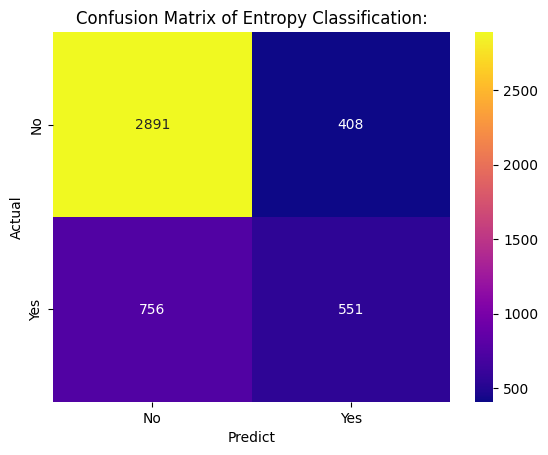

True Positives: 551
False Negatives: 756
False Positives: 408
True Negatives: 2891


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith showed confusion matrix of entropy using heatmap
sns.heatmap(vars_entropy_confusion_matrix, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], annot=True, fmt='d', cmap='plasma')
plt.title("Confusion Matrix of Entropy Classification:")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

# Varshith found True Positive, False Positive, False Negative, True Negative
Tru_Pos = vars_entropy_confusion_matrix[1, 1]
Fal_Neg= vars_entropy_confusion_matrix[1, 0]
Fal_Pos = vars_entropy_confusion_matrix[0, 1]
Tru_Neg = vars_entropy_confusion_matrix[0, 0]

# Varshith printed  True Positive, False Positive, False Negative, True Negative
print(f"True Positives: {Tru_Pos}")
print(f"False Negatives: {Fal_Neg}")
print(f"False Positives: {Fal_Pos}")
print(f"True Negatives: {Tru_Neg}")




# Comparing the Gini and entropy classifier.



> **For GINI;**


Accuracy of train: 0.7520445827603677
Accuracy of test: 0.7453321754233608. And we get confusion matrix with:


1.   True Positives: 544
2.   False Positives: 410,
1.   False Negatives: 763,
2.   True Negatives: 2889.



> Confusion matrix: [[2889  410]
 [ 763  544]]



> Accuracy=0.7453321754233608







> **For entropy;**

Accuracy of train: 0.7510313382065571
Accuracy of test: 0.747286148501954. And we get confusion matrix with:


1.   True Positives: 551
1.   False Positives: 408
2.   False Negatives: 756
2.   True Negatives: 2891



> Confusion Matrix=[[2891  408]
 [ 756  551]]

> Accuracy=0.747286148501954


> So, we can conclude that accuracy of gini and entropy for 75% train dataset and 25% test dataset split is Accuracy(gini)=0.7453321754233608, Accuracy(entropy)=0.747286148501954. So, I choosed entropy as classifier to compare to RFC.
































# Decision Tree Model(gini) with max_depth=5 (For all the features)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported plot_tree library from sklearn.tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned target variable y to 'captain_america'
captain_america = vars_final_data['y']


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned all features to vars_all_features list
vars_all_features = ['duration',	'campaign',	'pdays'	,'previous_contact_group','job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group']

# Varshith assigned vars_all_features to vars_feature_data
vars_feature_data = vars_final_data[vars_all_features]

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project'

# Varshith assigned vars_feature_data to boy variable
boy = vars_feature_data


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith used one-hot-encoder() for categorical data and assigned to boy
boy= pd.get_dummies(boy, columns=['job','previous_contact_group', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group'])

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith split the dataset with 75% train datset and 25% test dataset and randomstate=44
kkr_train, kkr_test, mi_train, mi_test = train_test_split(boy, captain_america, test_size=0.25, random_state=44)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created decisiontreeclassifier with max_depth=5, criterion='gini' and assigned to vars_dec_tree
vars_dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)

# Varshith fitted vars_dec_tree to kkr_train, mi_train
vars_dec_tree.fit(kkr_train, mi_train)

# Varshith found prediction of target variable with kkr_test
vars_dec_tree_pred = vars_dec_tree.predict(kkr_test)


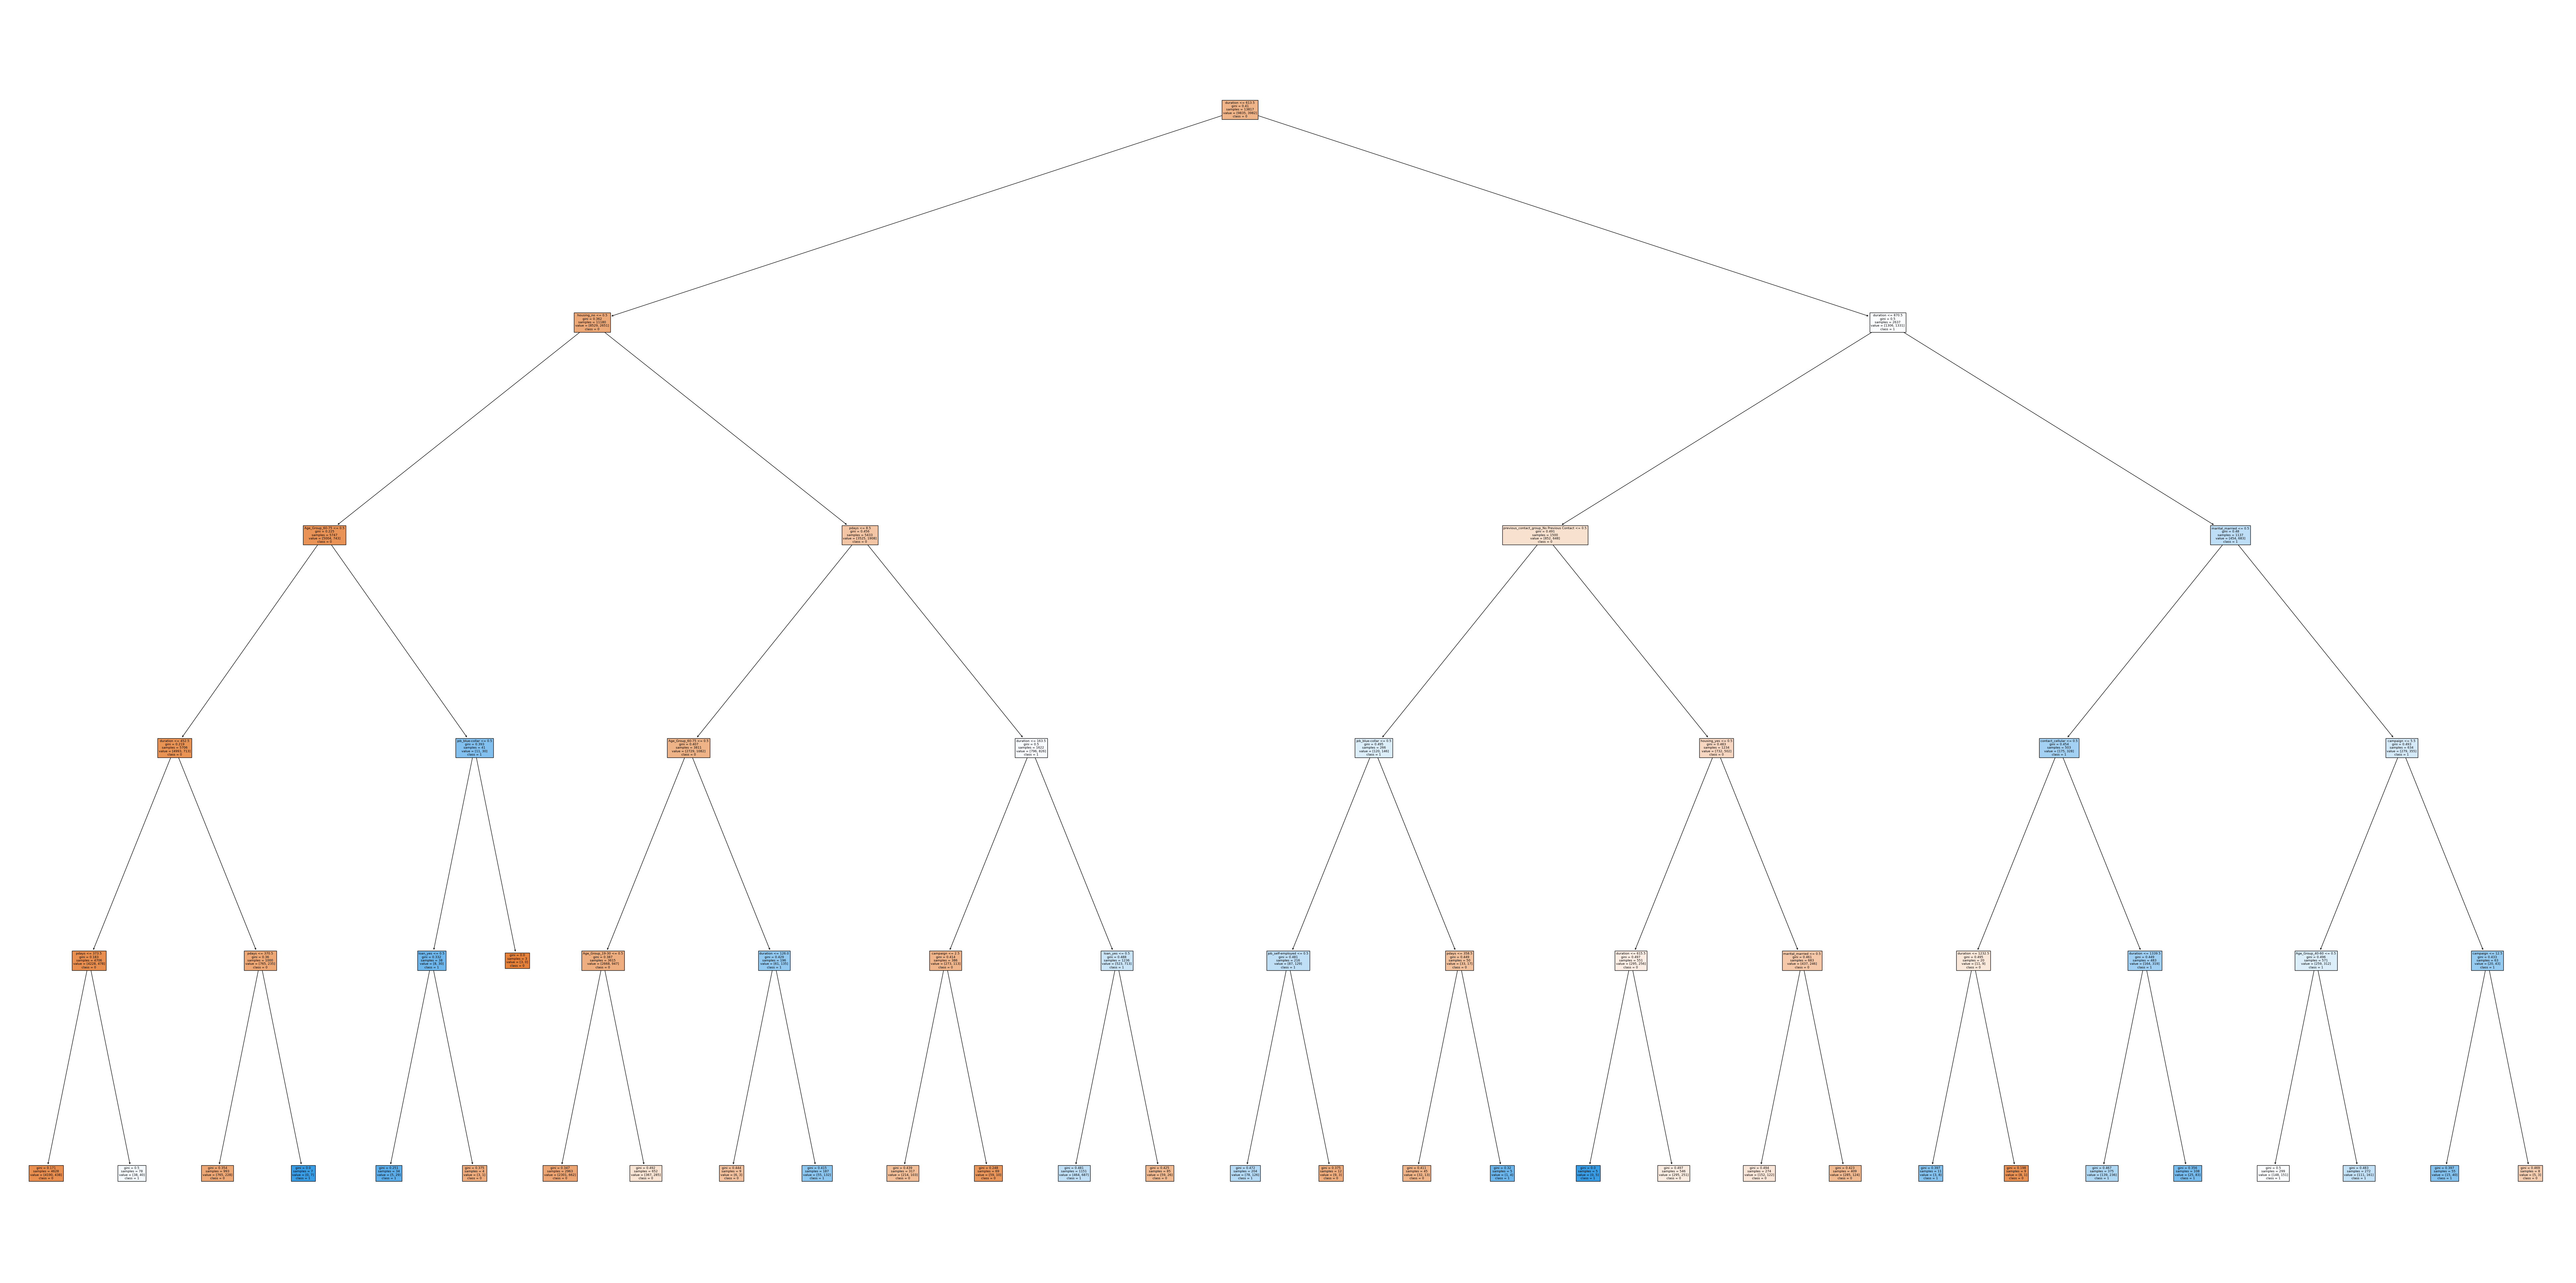

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith displayed the decision tree with max_depth=5
plt.figure(figsize=(100, 50))
plot_tree(vars_dec_tree, max_depth=5,feature_names=boy.columns, class_names=['0', '1'], filled=True)
plt.show()


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith calculated accuracy of decision tree
accuracy = accuracy_score(mi_test, vars_dec_tree_pred)

# Varshith printed the accuracy
print(f" Accuracy of Decision Tree Model(Gini) (all features): {accuracy}")

 Accuracy of Decision Tree Model(Gini) (all features): 0.7516283108988276


# Decision Tree(Gini) with max_depth=5 (For top_6 features)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned top 6 features to vars_top6 list
vars_top6 = ['education', 'duration', 'housing', 'Age_Group', 'job', 'previous_contact_group']

# Varshith assigned vars_top6 to vars_top6_data
vars_top6_data = vars_final_data[vars_top6]

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned vars_top6_data to boy variable
boy = vars_top6_data

# Varshith used one-hot-encoder() for categorical data and assigned to boy_cat
boy_cat= pd.get_dummies(boy, columns=['job','previous_contact_group', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group'])




In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned target variable y to captain_america variable
captain_america= vars_final_data['y']


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith splitted the dataset with test_size=0.25
kkr1_train, kkr1_test, mi1_train, mi1_test = train_test_split(boy_cat, captain_america, test_size=0.25, random_state=44)


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created decisiontreeclassifier with max_depth=5 and assigned to vars_6dec_tree
vars_6dec_tree = DecisionTreeClassifier(criterion='gini',max_depth=5)

# Varshith fitted vars_6dec_tree to kkr1_train, mi1_train
vars_6dec_tree.fit(kkr1_train, mi1_train)

# Varshith found prediction of target variable with kkr1_test
vars_top6_pred = vars_6dec_tree.predict(kkr1_test)

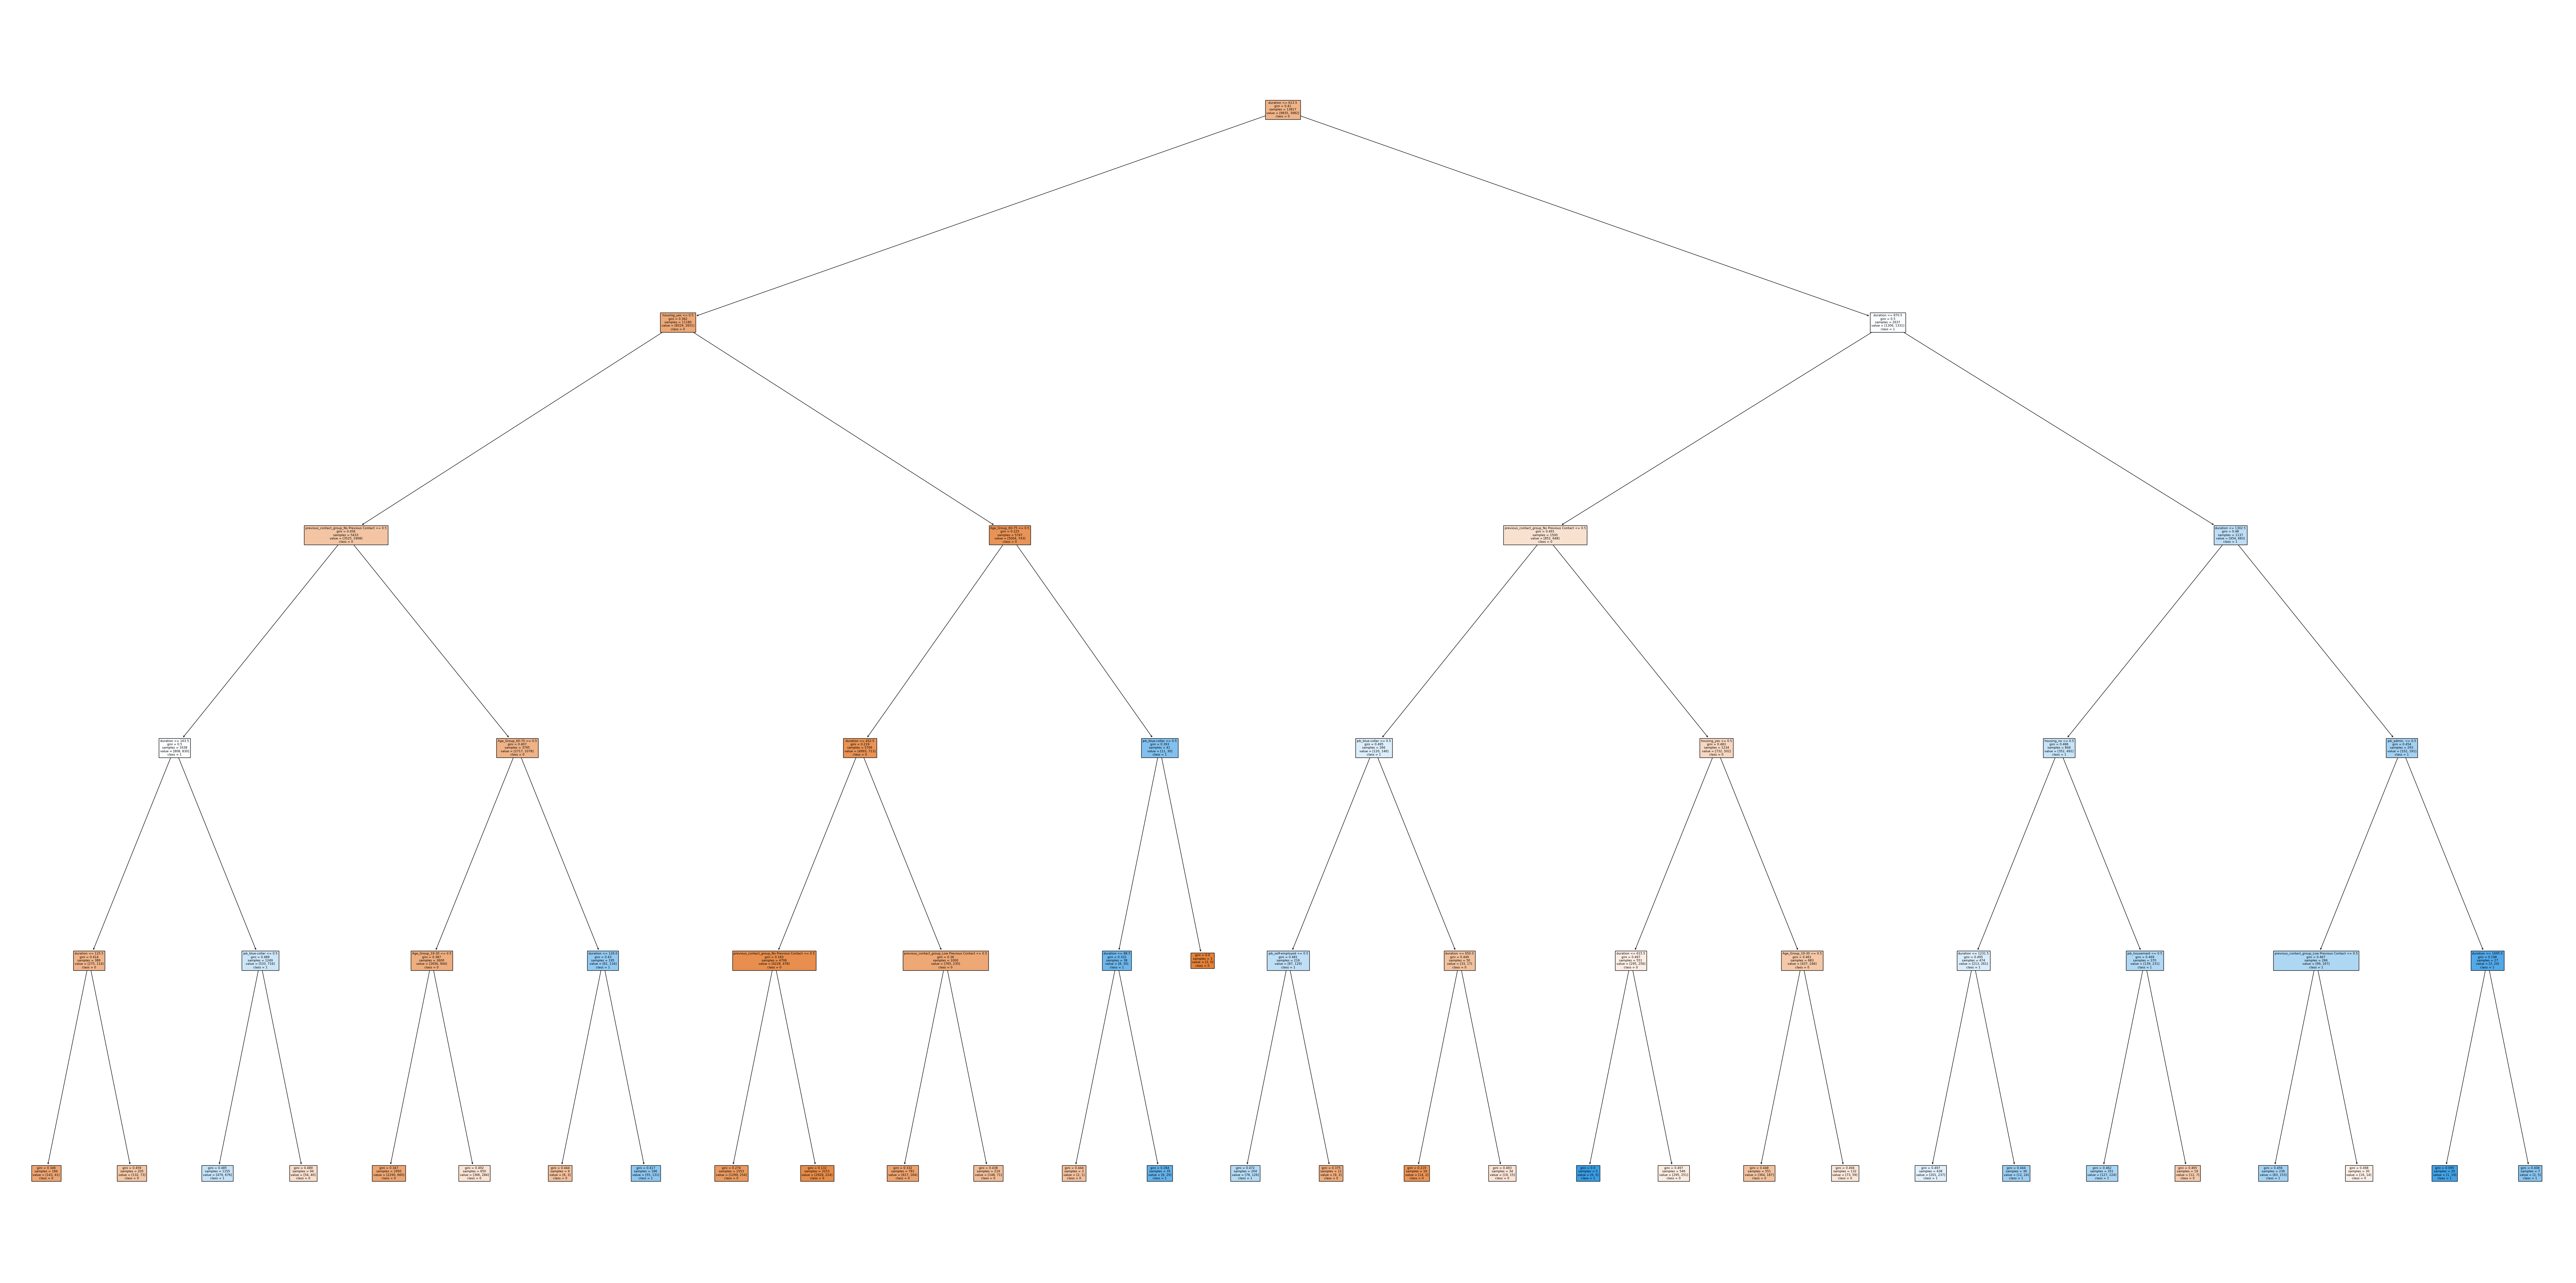

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith displayed the decision tree with max_depth=5
plt.figure(figsize=(100,50))
plot_tree(vars_6dec_tree, max_depth=5,feature_names=boy_cat.columns, class_names=['0', '1'], filled=True)
plt.show()



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith calculated accuracy of decision tree
accuracy = accuracy_score(mi1_test, vars_top6_pred)

# Varshith printed the accuracy
print(f" Accuracy of Decision Tree(top_6 features): {accuracy}")

 Accuracy of Decision Tree(top_6 features): 0.7475032566217976


# Conclusion on Decision Tree Classifier(Gini) with all features and with top 6 features.

I observed that,  Accuracy of Decision Tree Model(Gini) (all features): 0.7516283108988276 and Accuracy of Decision Tree(top_6 features): 0.7475032566217976, both are nearly same, there is no significant difference, so model works well if we consider all feature or only top 6 features( since accuracy are similar).

#  Decision Tree Model(entropy) with max_depth=5 for all features:

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported plot_tree library from sklearn.tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned all features to vars_all_feat list
vars_all_feat= ['duration',	'campaign',	'pdays'	,'previous_contact_group','job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group']

# Varshith assigned vars_all_feat to vars_data
vars_data = vars_final_data[vars_all_feat]

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned vars_data to boy variable
boy = vars_data

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project



# Varshith used one-hot-encoder() for categorical data and assigned to boy_cat0
boy_cat0= pd.get_dummies(boy , columns=['job','previous_contact_group', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group'])


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned target variable y to captain_america variable
captain_america= vars_final_data['y']


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith splitted the dataset with test_size=0.25
kkr2_train, kkr2_test, mi2_train, mi2_test = train_test_split(boy_cat0, captain_america, test_size=0.25, random_state=44)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created decisiontreeclassifier with max_depth=5 and assigned to vars_entropy_dec_tree
vars_entropy_dec_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

# Varshith fitted vars_entropy_dec_tree to kkr2_train, mi2_train
vars_entropy_dec_tree.fit(kkr2_train, mi2_train)

# Varshith found prediction of target variable with kkr2_test
vars_entropy_dec_tree_pred = vars_entropy_dec_tree.predict(kkr2_test)

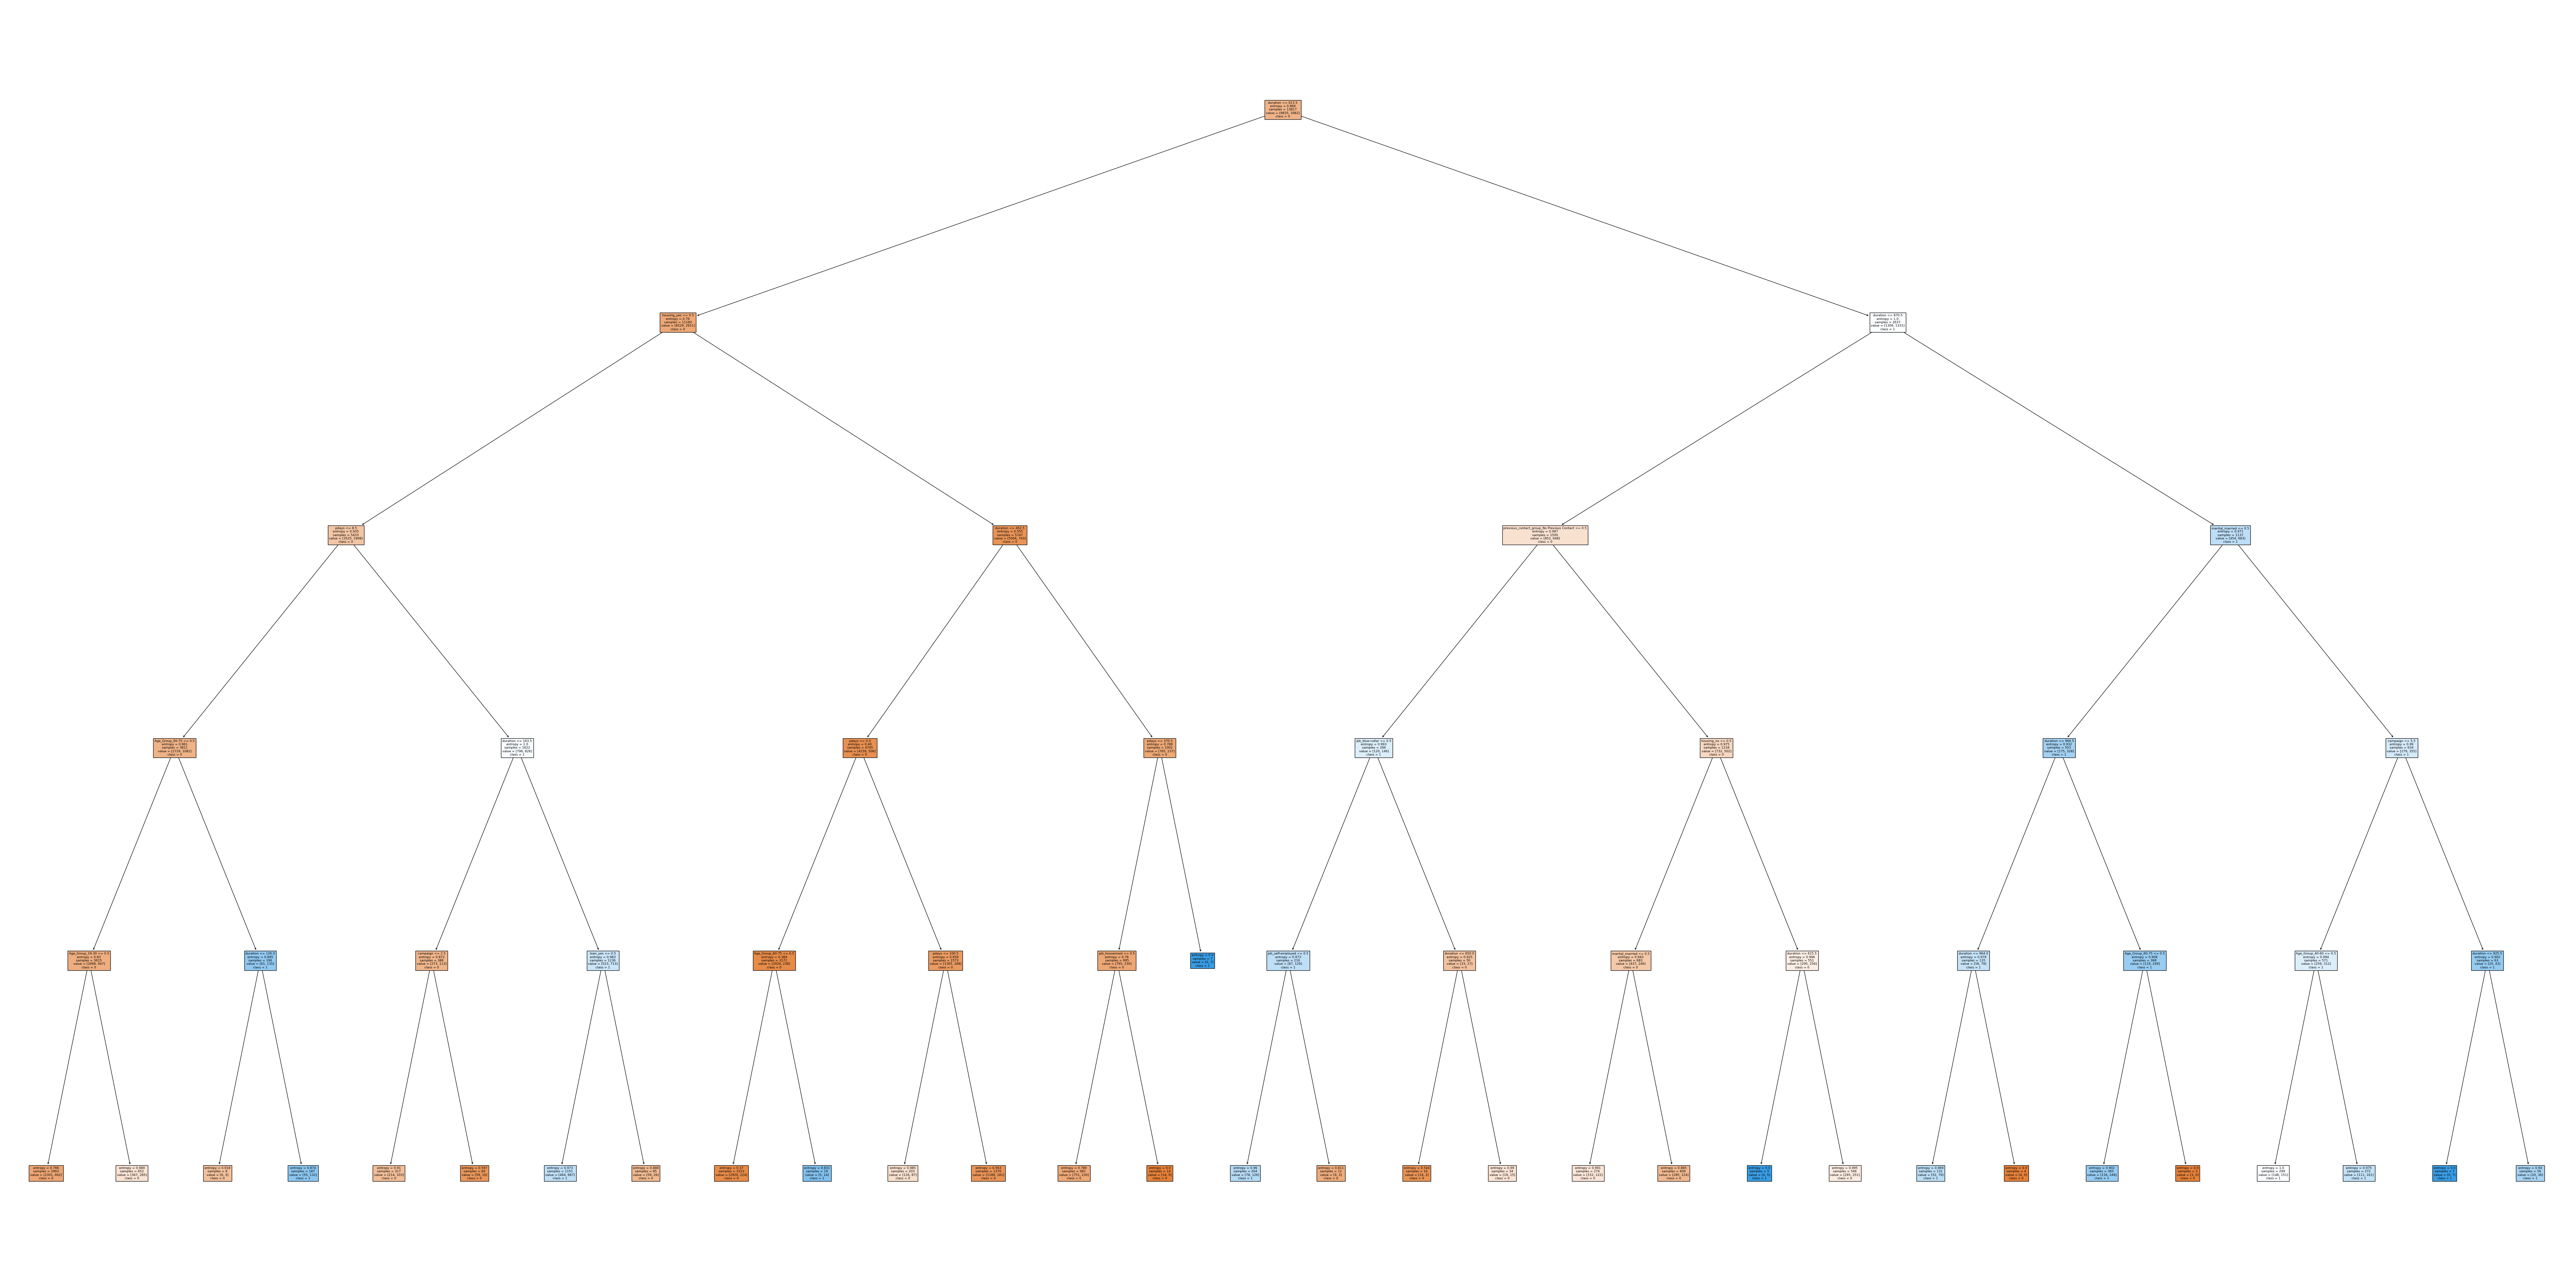

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith displayed the decision tree with max_depth=5
plt.figure(figsize=(100,50))
plot_tree(vars_entropy_dec_tree, max_depth=5,feature_names=boy_cat0.columns, class_names=['0', '1'], filled=True)
plt.show()


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith calculated accuracy of decision tree
accuracy = accuracy_score(mi2_test, vars_entropy_dec_tree_pred)

# Varshith printed the accuracy
print(f" Accuracy of Decision Tree(entropy)(all features): {accuracy}")

 Accuracy of Decision Tree(entropy)(all features): 0.7516283108988276


#  Decision Tree Model(entropy) with max_depth=5 for top 6 features:



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned top 6 features to vars_top6 list
vars_top6 = ['education', 'duration', 'housing', 'Age_Group', 'job', 'previous_contact_group']

# Varshith assigned vars_top6 to vars_top6_data
vars_top6_data = vars_final_data[vars_top6]

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned vars_top6_data to boy variable
boy = vars_top6_data

# Varshith used one-hot-encoder() for categorical data and assigned to boy_cat1
boy_cat1= pd.get_dummies(boy, columns=['education', 'housing', 'Age_Group', 'job','previous_contact_group'])


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith assigned target variable y to captain_america variable
captain_america= vars_final_data['y']


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith splitted the dataset with test_size=0.25
kkr3_train, kkr3_test, mi3_train, mi3_test = train_test_split(boy_cat1, captain_america, test_size=0.25, random_state=44)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created decisiontreeclassifier with max_depth=5 and assigned to vars_6dec_tree
vars_6dec_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

# Varshith fitted vars_6dec_tree to kkr3_train, mi3_train
vars_6dec_tree.fit(kkr3_train, mi3_train)

# Varshith found prediction of target variable with kkr3_test
vars_top6_pred = vars_6dec_tree.predict(kkr3_test)

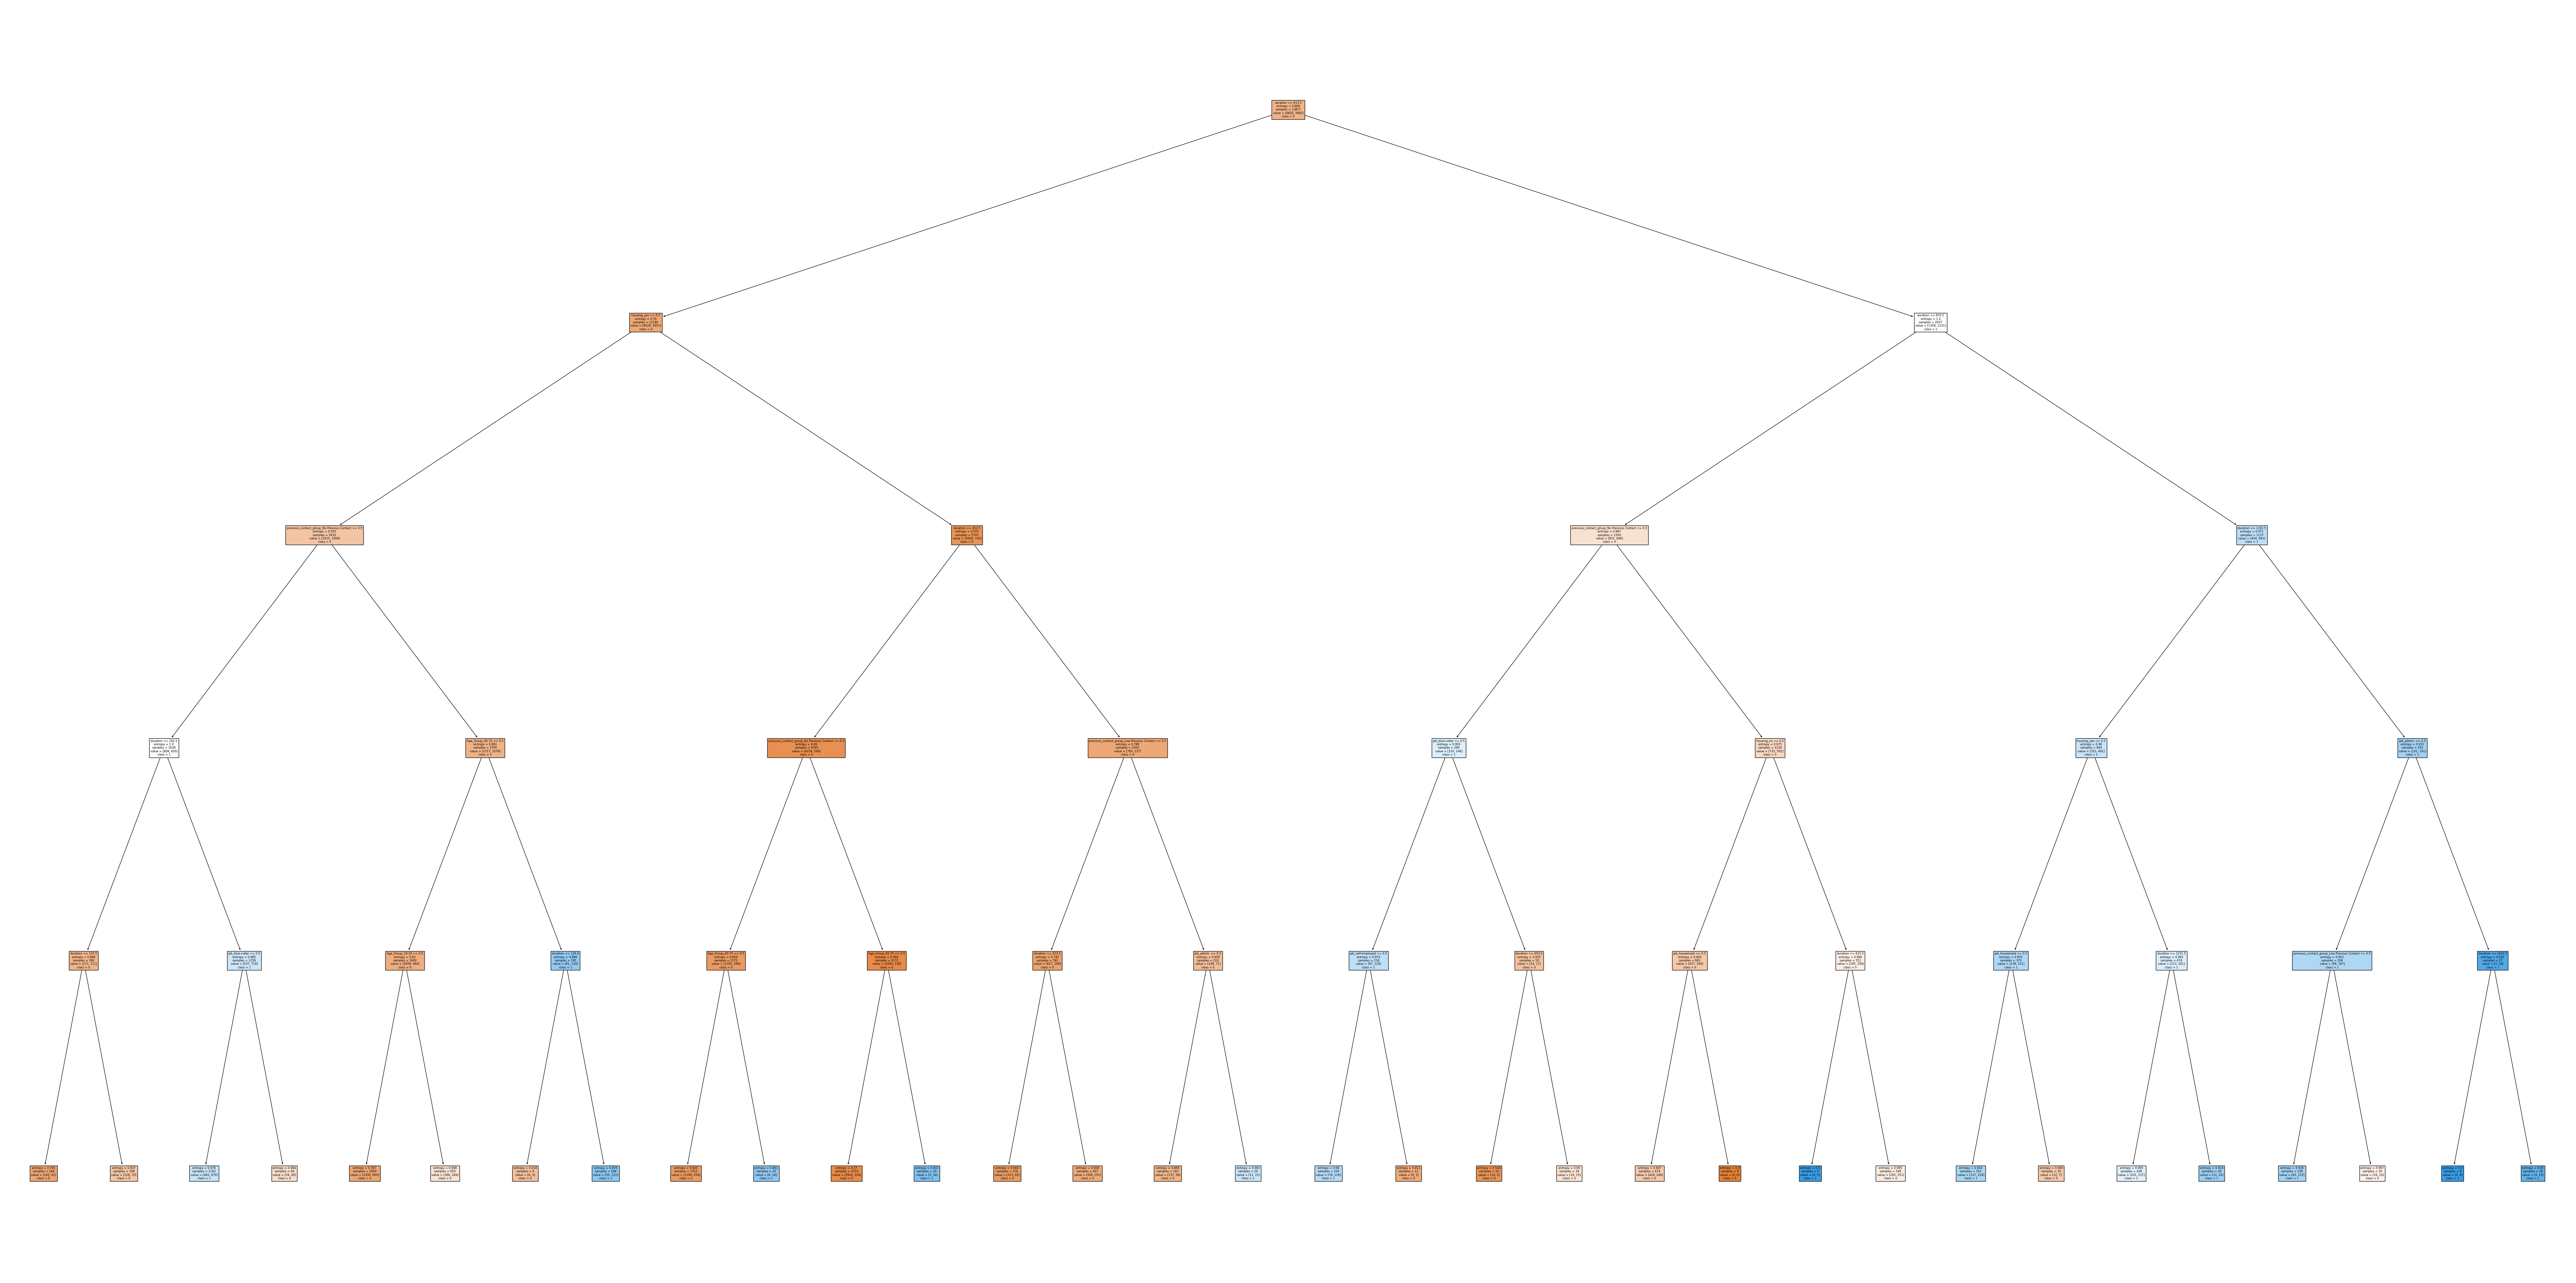

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith displayed the decision tree with max_depth=5
plt.figure(figsize=(100,50))
plot_tree(vars_6dec_tree, max_depth=5,feature_names=boy_cat1.columns, class_names=['0', '1'], filled=True)
plt.show()


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith calculated accuracy of decision tree
accuracy = accuracy_score(mi3_test, vars_top6_pred)

# Varshith printed the accuracy
print(f" Accuracy of Decision Tree(entropy)(top_6 features): {accuracy}")

 Accuracy of Decision Tree(entropy)(top_6 features): 0.7468519322622666


# Conclusion on Decision Tree Classifier(Entropy) with all features and with top 6 features.

I observed that,  Accuracy of Decision Tree Model(entropy) (all features): 0.7516283108988276 and Accuracy of Decision Tree(top_6 features): 0.7468519322622666, both are nearly same, there is no significant difference, so model works well if we consider all feature or only top 6 features( since accuracy are similar).


> And I observed that Accuracy of Decision Tree Model(Gini) (all features): 0.7516283108988276 and  Accuracy of Decision Tree(entropy)(all features): 0.7516283108988276 are same. So, I continue to use entropy classifier.





# Task Random Forest Classifier

In [22]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned the all continuous features to vars_cont_features
vars_cont_features = ['duration',	'campaign',	'pdays'	]

# Varshith assigned the all categorical features to vars_cat_features
vars_cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group','previous_contact_group']



In [24]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_preprocess_feature that add standardscaler() to continuous features and onehotencoder() to categorical features.
vars_preprocess_feature = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), vars_cont_features),
        ('categorical', OneHotEncoder(), vars_cat_features)
    ])



NameError: ignored

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith added vars_preprocess to training data
vars_train_prepro = vars_preprocess_feature.fit_transform(kkr_train)

# Varshith added vars_preprocess to test data
vars_test_prepro = vars_preprocess_feature.transform(kkr_test)


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_random_f_class and assignes with RandomForestClassifier with n_estimators=50(has 50 trees)
vars_random_f_class = RandomForestClassifier(n_estimators=50, random_state=44)

# Varshith trained random forrest classifier vars_random_f_class using vars_train_prepro training dataset, and mi_train as target variable
vars_random_f_class.fit(vars_train_prepro, mi_train)


RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith found train and test accuracy
vars_train_acc = vars_random_f_class.score(vars_train_prepro, mi_train)
vars_test_acc = vars_random_f_class.score(vars_test_prepro, mi_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed train and test accuracy
print(f"Accuracy of train: {vars_train_acc}")
print(f"Accuracy of test: {vars_test_acc}")

Accuracy of train: 0.9969602663385684
Accuracy of test: 0.7194963091619626


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned the all continuous features to vars_cont_features
vars_cont_features = ['duration',	'campaign',	'pdays']

# Varshith assigned the all categorical features to vars_cat_features
vars_cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group','previous_contact_group']

# Varshith assigned target variable 'y' to vars_target
vars_target = 'y'

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith conveted categorical to continuous variable using onehotencoder
vars_cat_to_cont = pd.get_dummies(vars_final_data[vars_cat_features], drop_first=True)


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith combined both continuous attribute and converted categorical attributes and assigned to vars_features
vars_features = pd.concat([vars_final_data[vars_cont_features], vars_cat_to_cont], axis=1)

# Varshith assigned vars_target to vars_result
vars_result= vars_final_data[vars_target]

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith splitted the dataset with test_size=0.25 and assigned random_state=44
kkr_train, kkr_test, mi_train, mi_test = train_test_split(vars_features, vars_result, test_size=0.25, random_state=44)





In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_random_f_class and assignes with RandomForestClassifier with n_estimators=50(has 50 trees)
vars_random_f_class = RandomForestClassifier(n_estimators=10, random_state=44)

# Varshith trained random forrest classifier vars_random_f_class using vars_train_prepro training dataset, and mi_train as target variable
vars_random_f_class.fit(kkr_train, mi_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith predicted kkr_test using RandomForestClassifier and stored in mi_pred
mi_pred = vars_random_f_class.predict(kkr_test)



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported accuracy_score library from sklearn.metrics
from sklearn.metrics import accuracy_score

# Varshith calculated Random Forrest Classiffier accuracy
vars_rfc_accuracy = accuracy_score(mi_test, mi_pred)



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed Random Forrest Classiffier accuracy
print(f"Accuracy of Random Forest Classifier : {vars_rfc_accuracy}")

Accuracy of Random Forest Classifier : 0.7249240121580547


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported all the required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned the all continuous features to vars_cont_features
vars_cont_features = ['duration',	'campaign',	'pdays']

# Varshith assigned the all categorical features to vars_cat_features
vars_cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group','previous_contact_group']


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_preprocess_feature that add standardscaler() to continuous features and onehotencoder() to categorical features.
vars_preprocess_feature = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), vars_cont_features),
        ('categorical', OneHotEncoder(), vars_cat_features)
    ])


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith added vars_preprocess to training data
vars_train_prepro = vars_preprocess_feature.fit_transform(kkr_train)

# Varshith added vars_preprocess to test data
vars_test_prepro = vars_preprocess_feature.transform(kkr_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_random_f_class and assignes with RandomForestClassifier with n_estimators=50(has 50 trees)
vars_random_f_class = RandomForestClassifier(n_estimators=50, random_state=44)

# Varshith trained random forrest classifier vars_random_f_class using vars_train_prepro training dataset, and mi_train as target variable
vars_random_f_class.fit(vars_train_prepro, mi_train)


RandomForestClassifier(n_estimators=50, random_state=44)

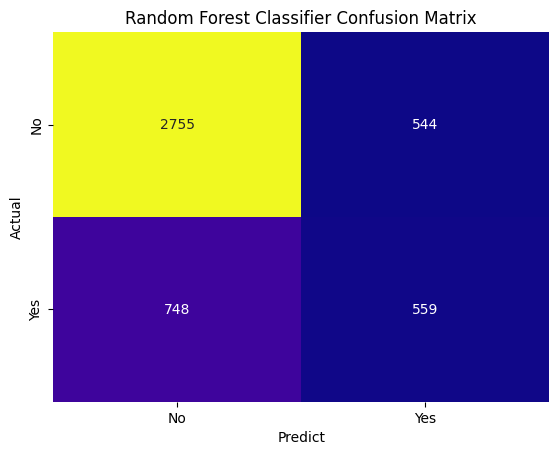

True Positives: 559
False Negatives: 748
False Positives: 544
True Negatives: 2755


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith predicted the test dataset and stored in mi_predict
mi_pred = vars_random_f_class.predict(vars_test_prepro)

# Varshith calculated Confusion matrix of Random forest classifier using mi_test, mi_pred
Random_f_C_conf_matrix = confusion_matrix(mi_test, mi_pred)

# Varshith displayed confusion matrix in the form of Heatmap
sns.heatmap(Random_f_C_conf_matrix, annot=True, fmt='d', cmap='plasma', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

# Varshith found True Positive, False Positive, False Negative, True Negative
Tru_Pos = Random_f_C_conf_matrix[1, 1]
Fal_Neg= Random_f_C_conf_matrix[1, 0]
Fal_Pos = Random_f_C_conf_matrix[0, 1]
Tru_Neg = Random_f_C_conf_matrix[0, 0]

# Varshith printed  True Positive, False Positive, False Negative, True Negative
print(f"True Positives: {Tru_Pos}")
print(f"False Negatives: {Fal_Neg}")
print(f"False Positives: {Fal_Pos}")
print(f"True Negatives: {Tru_Neg}")




In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith printed confusion matrix
print(Random_f_C_conf_matrix)

[[2755  544]
 [ 748  559]]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported classification_report using sklearn.metrics
from sklearn.metrics import classification_report

# Varshith predicted the test dataset and stored in mi_predict
mi_pred = vars_random_f_class.predict(vars_test_prepro)

# Varshith calculated the classification report of Random Forest Classifier using mi_test, mi_pred
random_f_c_classification_report = classification_report(mi_test, mi_pred, target_names=['No', 'Yes'])

# Varshith printed the classification report
print(random_f_c_classification_report)


              precision    recall  f1-score   support

          No       0.79      0.84      0.81      3299
         Yes       0.51      0.43      0.46      1307

    accuracy                           0.72      4606
   macro avg       0.65      0.63      0.64      4606
weighted avg       0.71      0.72      0.71      4606



# Evaluation of the decision tree model and Random Forest Classifier.



**> Decision tree model(using entropy):**
Accuracy of train: 0.7510313382065571
Accuracy of test: 0.747286148501954. And we get confusion matrix with:




1.   True Positives: 551
2.   False Negatives: 756
1.   False Positives: 408
2.   True Negatives: 2891







> Confusion matrix: [[2889  410]
 [ 763  544]]



> Accuracy=0.7453321754233608
We can observe that train and test accuracy for entropy is similar and there is no significant difference, so it does not lead to overfitting. And model performs well.



>** Random Forest Classifier:**

Accuracy of train: 0.9969602663385684
Accuracy of test: 0.7194963091619626
. And we get confusion matrix with:

True Positives: 600
False Negatives: 707
False Positives: 518
True Negatives: 2781

1.  True Positives: 559
2.  False Negatives: 748
1.  False Positives: 544
2.  True Negatives: 2755





Confusion matrix:[[2755  544]
 [ 748  559]]

Accuracy of Random Forest Classifier : 0.7249240121580547

We can observe that train and test accuracies for Random Forest Classifier is significant different so, it leads to overfitting, model does not performs well.

We can finally conclude that decision tree model(entropy) perform well since accuracy is high and it does not lead to overfitting.









# Task ROC Curve

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith imported roc_curve, roc_auc_score libraries from sklearn.metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith assigned the all continuous features to vars_cont_features
vars_cont_features = ['duration',	'campaign',	'pdays']

# Varshith assigned the all categorical features to vars_cat_features
vars_cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'Age_Group','account_balance_group','previous_contact_group']

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_preprocess_feature that add standardscaler() to continuous features and onehotencoder() to categorical features.
vars_preprocess_feature = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), vars_cont_features),
        ('categorical', OneHotEncoder(), vars_cat_features)
    ])



In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith added preprocessor to decisiontreeclassifier(entropy) model using pipeline
vars_entropy_pipeline = Pipeline(steps=[('preprocessor', vars_preprocess_feature),
                           ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10, random_state=44))])


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project


# Varshith added vars_preprocess to training data
vars_train_prepro = vars_preprocess_feature.fit_transform(kkr_train)

# Varshith added vars_preprocess to test data
vars_test_prepro = vars_preprocess_feature.transform(kkr_test)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Vrashith fitted vars_pipeline to training data
vars_entropy_pipeline.fit(kkr_train, mi_train)

# Varshith using predict_proba calculated class probability in kkr_test and stored in vars_pedicted_probability_entropy
vars_pedicted_probability_entropy = vars_entropy_pipeline.predict_proba(kkr_test)[:, 1]


In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith created vars_random_f_class and assignes with RandomForestClassifier with n_estimators=50(has 50 trees)
vars_random_f_class = RandomForestClassifier(n_estimators=50, random_state=44)

# Varshith trained random forrest classifier vars_random_f_class using vars_train_prepro training dataset, and mi_train as target variable
vars_random_f_class.fit(vars_train_prepro, mi_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith using predict_proba calculated class probability in kkr_test and stored in vars_predicted_probability_random_f_c
vars_predicted_probability_random_f_c = vars_random_f_class.predict_proba(vars_test_prepro)[:, 1]

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated False Positive Rate and True Positive rate of Entropy
false_positive_rate_entropy, true_positive_rate_entropy, _ = roc_curve(mi_test,vars_pedicted_probability_entropy )

# Varshith calculated False Positive Rate and True Positive rate of Random Forest Classifier
false_positive_rate_random_forest_classifier, true_positive_rate_random_forest_classifier, _ = roc_curve(mi_test, vars_predicted_probability_random_f_c )


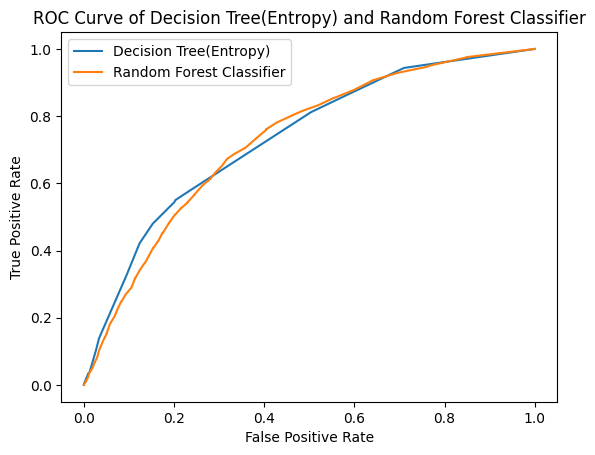

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith plotted ROC curve of entropy and Random forest classifier
plt.plot(false_positive_rate_entropy, true_positive_rate_entropy, label='Decision Tree(Entropy)')
plt.plot(false_positive_rate_random_forest_classifier, true_positive_rate_random_forest_classifier, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')   # Xlabel
plt.ylabel('True Positive Rate')    # Ylabel
plt.title('ROC Curve of Decision Tree(Entropy) and Random Forest Classifier')  # Title
plt.legend()                        # Legend of plot
plt.show()                          # Display the plot

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith calculated Area Under curve(auc) of entropy
entropy_area_under_curve = roc_auc_score(mi_test, vars_pedicted_probability_entropy)


# Varshith calculated Area Under curve(auc) of Random Forest Classifier
random_forest_class_area_under_curve= roc_auc_score(mi_test, vars_predicted_probability_random_f_c)

In [ ]:
# Varshith Konduru(1002132051)
# My Individual Project

# Varshith prints Area Under curve(auc) of entropy
print(f"Area Under curve(auc) of entropy:{entropy_area_under_curve}")

# Varshith prints Area Under curve(auc) of Random Forest Classifier
print(f"Area Under curve(auc) of Random Forest Classifier:{random_forest_class_area_under_curve}")

Area Under curve(auc) of entropy:0.7336948921249236
Area Under curve(auc) of Random Forest Classifier:0.7279854343657034


# Interpretion of the ROC graph.



> In ROC graph, we plotted the ROC curve of Decision tree classifier(entropy) and Random forest classifier. We calculated False Positive Rate and True Positive rate of Entropy, and False Positive Rate and True Positive rate of Random Forest Classifier and using this values we plotted the ROC Curve. We know that classifier with highest Area Under curve(auc) helps the model perform well. So, we calculated Area Under curve(auc) of entropy and Area Under curve(auc) of Random Forest Classifier. We observed that;


1.   Area Under curve(auc) of entropy:0.7336948921249236
2.   Area Under curve(auc) of Random Forest Classifier:0.7279854343657034

So, from this we can say that Decision tree classifier(entropy) can be used to make model perform well, as compared to Random Forest Classifier.







#  

